In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_excel("data.xlsx")
data.head()

Client Unnamed: 1 Unnamed: 2             Contract  \
0            NaN        NaN        NaN                  NaN   
1            CNP     Gender        Age         DataSemnarii   
2  1900226063350          M         32  2021-10-15 18:37:54   
3  1900226063350          M         32  2021-11-06 03:38:12   
4  1811228048420          M         41  2021-10-15 10:43:41   

            Unnamed: 4  Unnamed: 5 Unnamed: 6   Unnamed: 7 Unnamed: 8  \
0                  NaN         NaN        NaN          NaN        NaN   
1           DataInchis      Number     Produs  CreditLimit      State   
2  2021-10-16 18:11:03  DK53851057    Penguin         1900     Inchis   
3  2021-12-10 12:29:02  TC42768422    Penguin          700     Inchis   
4  2022-01-14 16:20:02  HP51173676    Penguin         2000     Inchis   

               Scoring  ...         Unnamed: 21         Unnamed: 22  \
0                  NaN  ...                 NaN                 NaN   
1          scoringdate  ...  PenguinIgnoringBNR  DolphinIgnoringBNR   
2  2021-10-15 00:31:13  ...                   0                   0   
3  2021-10-15 00:31:13  ...                   0                   0   
4  2021-10-15 07:34:50  ...                   0                   0   

      Unnamed: 23 Unnamed: 24  Collection     Unnamed: 26 Unnamed: 27  \
0             NaN         NaN         NaN             NaN         NaN   
1  ClientCategory   Comission  Withdrawed  DpdDiffDaysMax    DpdTotal   
2               0           0       -1900             -27           0   
3               0           0        -700             -22           0   
4               0           0       -2000               3           0   

  Unnamed: 28  Unnamed: 29          Computed  
0         NaN          NaN               NaN  
1   PaidTotal  FutureTotal  IsDerrogationBNR  
2     1907.56            0               NaN  
3      783.58            0               NaN  
4     2239.08            0               NaN  

[5 rows x 31 columns]

In [3]:
data.columns = data.iloc[1]

In [4]:
df=data.drop([0,1], inplace=False)
df=df.reset_index()
df=df.drop(df.columns[0],axis=1)

In [5]:
df=df.drop(['CNP','Number'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12516 entries, 0 to 12515
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Gender              12516 non-null  object
 1   Age                 12516 non-null  object
 2   DataSemnarii        12516 non-null  object
 3   DataInchis          6827 non-null   object
 4   Produs              12516 non-null  object
 5   CreditLimit         12516 non-null  object
 6   State               12516 non-null  object
 7   scoringdate         12516 non-null  object
 8   score               12516 non-null  object
 9   ProbabilityOfModel  12516 non-null  object
 10  DeclIncome          12516 non-null  object
 11  ANAFIncome          12516 non-null  object
 12  TotalLoanPayments   12516 non-null  object
 13  BNR40Available      12516 non-null  object
 14  CreditsBefore       12516 non-null  object
 15  OfferCrab           12516 non-null  object
 16  OfferPenguin        12

## Toate coloanele sunt object,va fi `putin` de lucru

In [7]:
df.isnull().sum()

1
Gender                    0
Age                       0
DataSemnarii              0
DataInchis             5689
Produs                    0
CreditLimit               0
State                     0
scoringdate               0
score                     0
ProbabilityOfModel        0
DeclIncome                0
ANAFIncome                0
TotalLoanPayments         0
BNR40Available            0
CreditsBefore             0
OfferCrab                 0
OfferPenguin              0
OfferDolphin              0
CrabIgnoringBNR           0
PenguinIgnoringBNR        0
DolphinIgnoringBNR        0
ClientCategory            0
Comission                 0
Withdrawed                0
DpdDiffDaysMax            0
DpdTotal                  0
PaidTotal                 0
FutureTotal               0
IsDerrogationBNR      11405
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['DataInchis']=pd.to_datetime(df['DataInchis'])
df['DataSemnarii']=pd.to_datetime(df['DataSemnarii'])
df['scoringdate']=pd.to_datetime(df['scoringdate'])

In [10]:
numeric_columns=['Age','CreditLimit','score','ProbabilityOfModel','DeclIncome','ANAFIncome','TotalLoanPayments','BNR40Available',
                 'CreditsBefore','OfferCrab','OfferPenguin','OfferDolphin','CrabIgnoringBNR','PenguinIgnoringBNR','DolphinIgnoringBNR',
                 'ClientCategory','Comission','Withdrawed','DpdDiffDaysMax','DpdTotal','PaidTotal','FutureTotal']

In [11]:
for column in numeric_columns:
    df[column]=pd.to_numeric(df[column])

In [12]:
dummy_df = pd.get_dummies(df['Produs'])
df= pd.concat([df, dummy_df], axis=1)
df=df.drop("Produs",axis=1)

In [13]:
object_values=[]
ob_coll=df.select_dtypes(object).columns
for column in ob_coll:
     object_values.append(np.count_nonzero(df[column].value_counts()))

In [14]:
object_values=[]
ob_coll=df.select_dtypes(object).columns
for column in ob_coll:
     object_values.append(np.count_nonzero(df[column].value_counts()))

<BarContainer object of 3 artists>

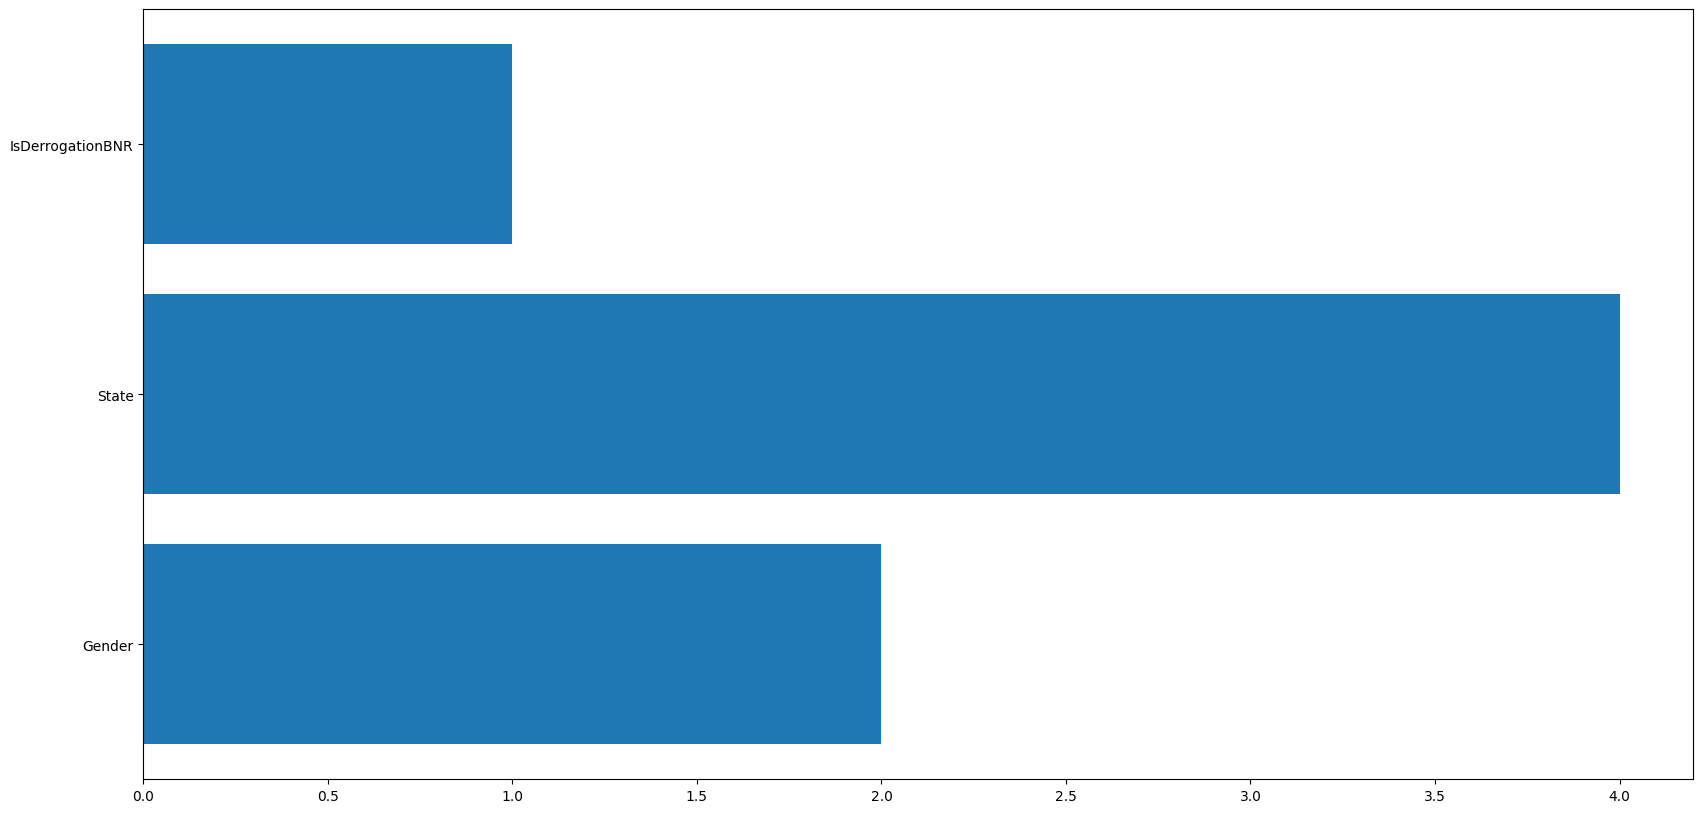

In [15]:
fig = plt.figure(figsize = (20,10))
plt.barh(ob_coll,object_values, label = 'values')

In [16]:
df['IsDerrogationBNR'].value_counts()

True    1111
Name: IsDerrogationBNR, dtype: int64

In [17]:
df['IsDerrogationBNR']=df['IsDerrogationBNR'].fillna(False)

In [18]:
df['State'].value_counts()

Inchis       6827
Activ        5429
Executare     259
Moneysend       1
Name: State, dtype: int64

In [19]:
df = df[df['State'] != 'Moneysend']

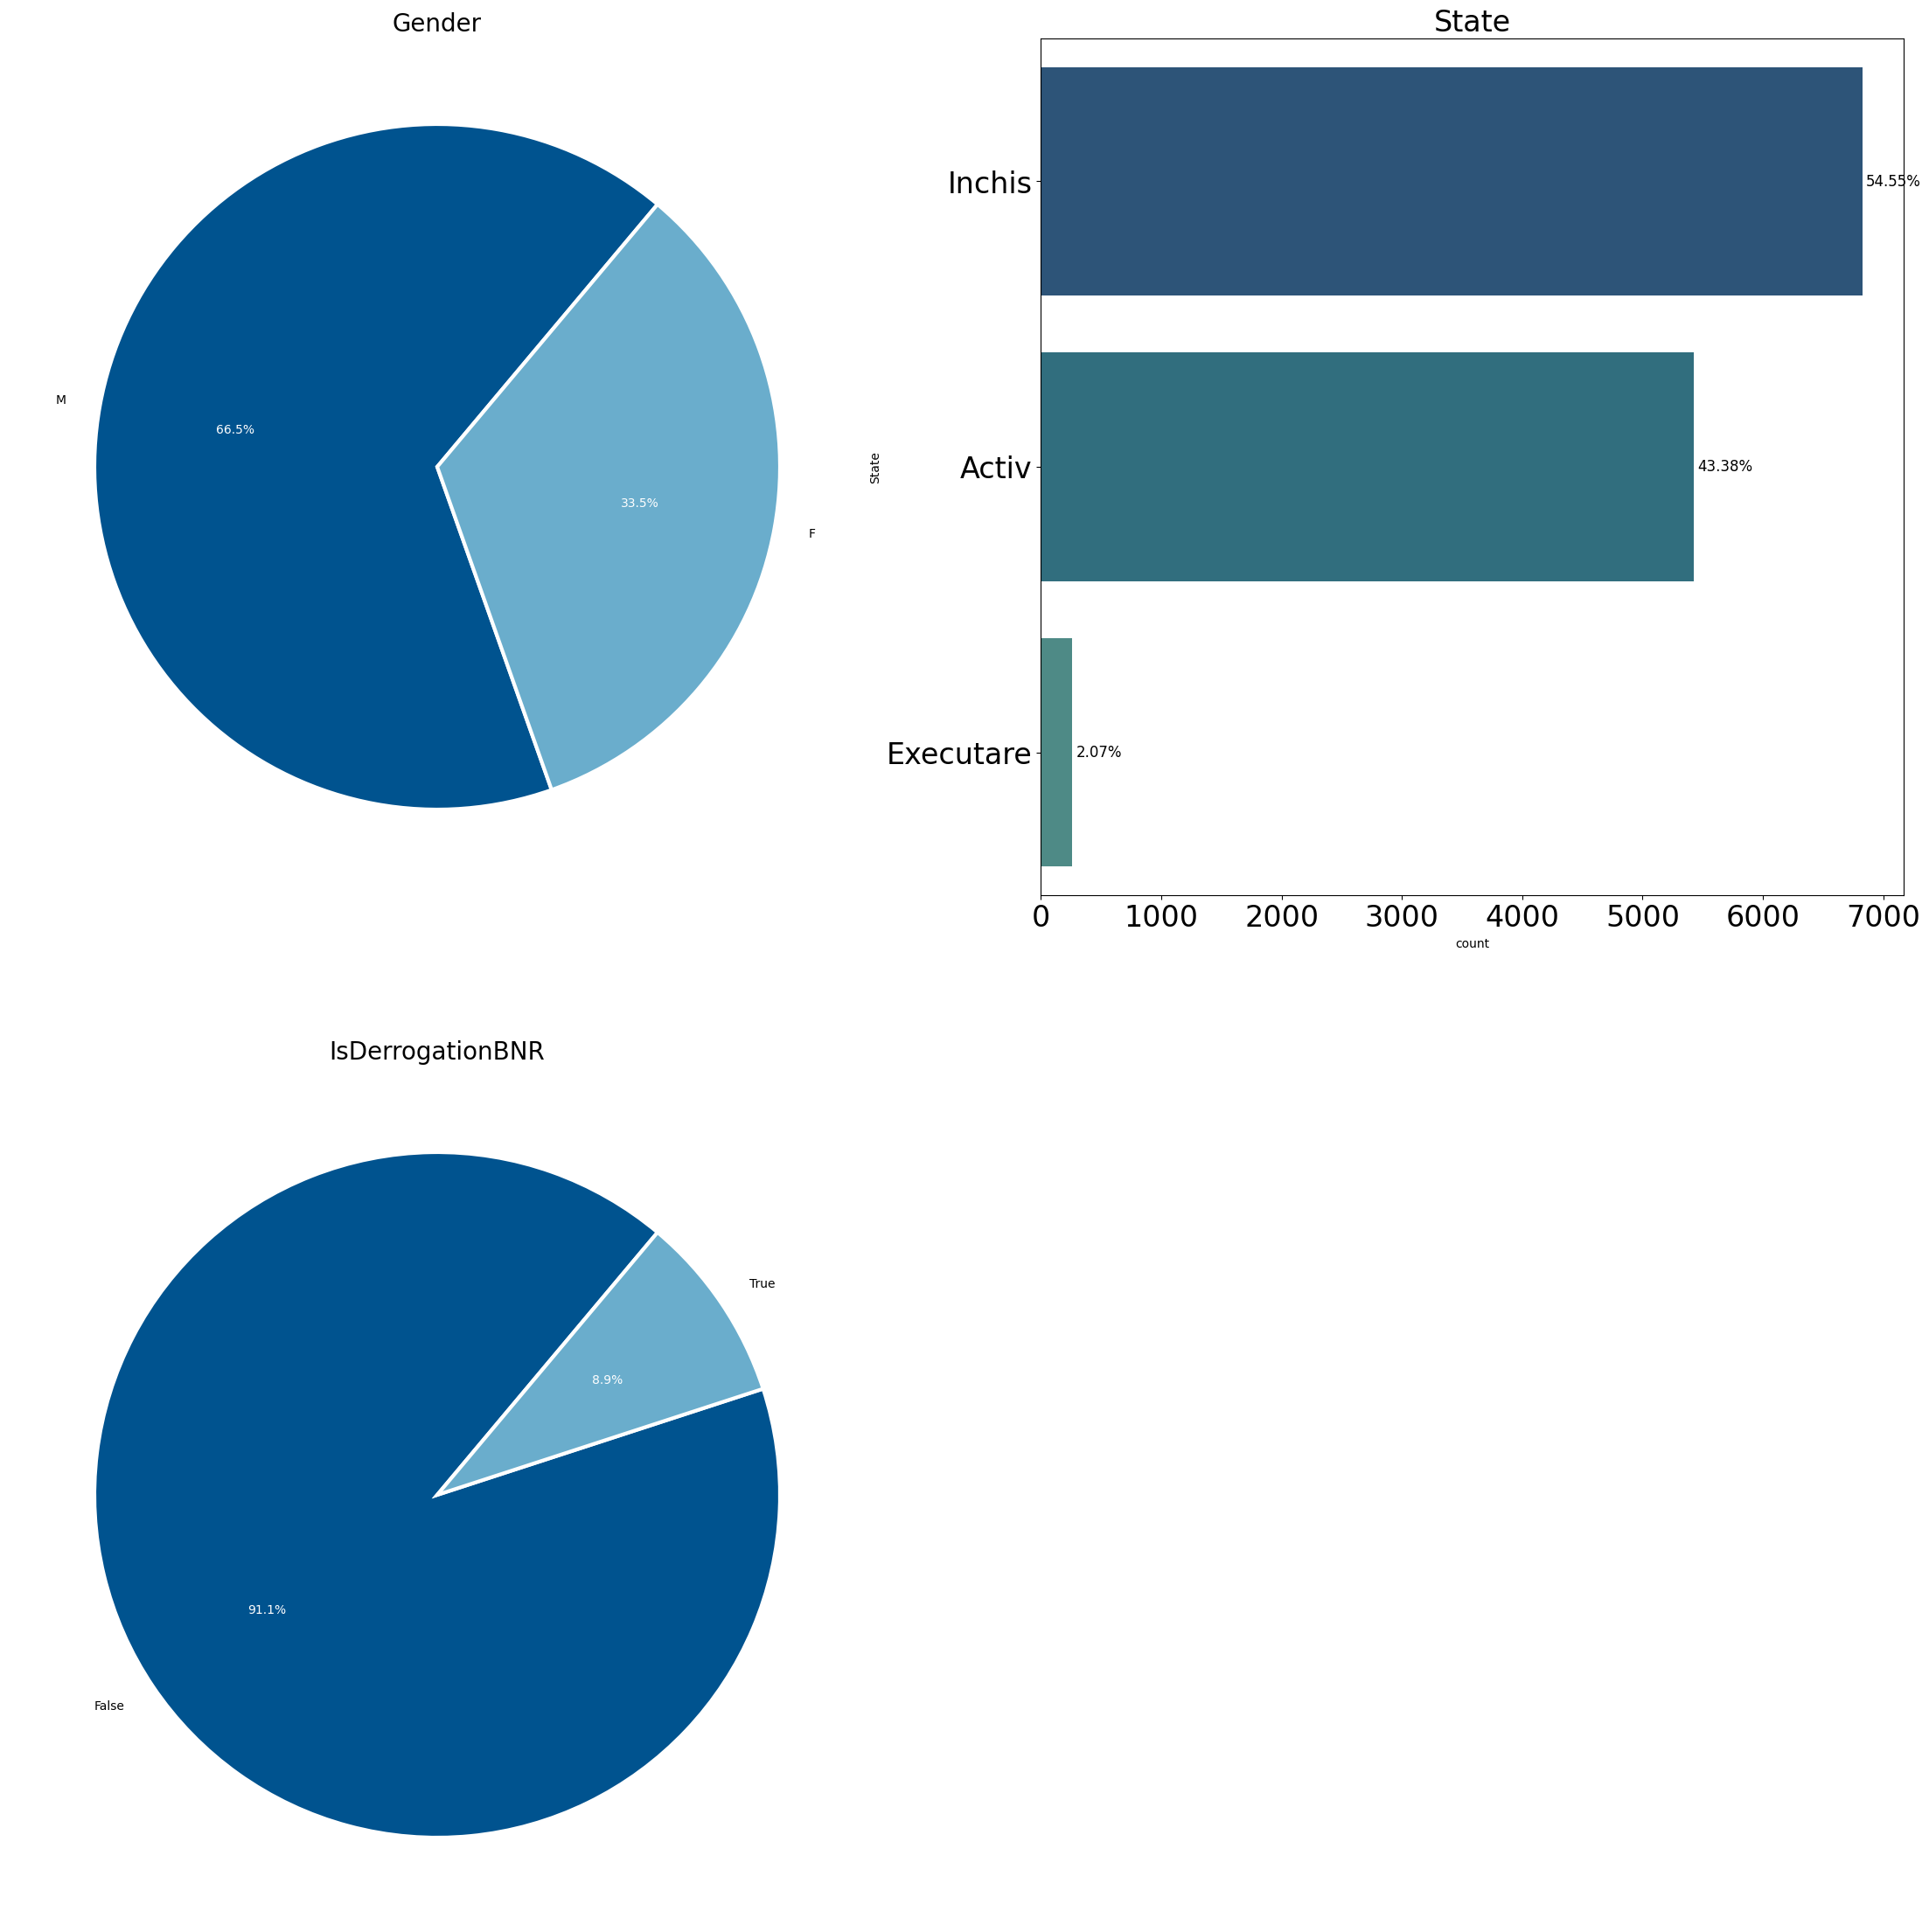

In [20]:
fig, ax = plt.subplots(figsize =(28, 28))
fig.patch.set_facecolor('white')
colors = sns.color_palette("crest_r", n_colors=4).as_hex()

for i in (enumerate(ob_coll)):
    plt.subplot(2, 2, i[0]+1)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    
    if df[i[1]].value_counts().count() > 2:
        ax = sns.countplot(y = i[1], data = df, order=df[i[1]].value_counts().index, palette=colors)
        pct = df[i[1]].value_counts(ascending=False, normalize=True).values * 100
        ax.bar_label(container=ax.containers[0], labels=list(map('{:.2f}%'.format,pct)), padding=3, size=12, color='black')
        ax.grid(False)
        plt.title(i[1], fontsize=24, color='black')
        

    else:
        _, texts, pcts = plt.pie(
            df[i[1]].value_counts(), 
            labels=df[i[1]].value_counts().index, 
            colors= ['#00538F', '#6AADCC'],
            autopct='%1.1f%%', 
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            startangle=50)
        for pcts in pcts:
          pcts.set_color('white')
        plt.title(i[1], fontsize=20, color='black')
        plt.xticks(fontsize=24)
        plt.yticks(fontsize=24)


plt.show()  

<function matplotlib.pyplot.show(close=None, block=None)>

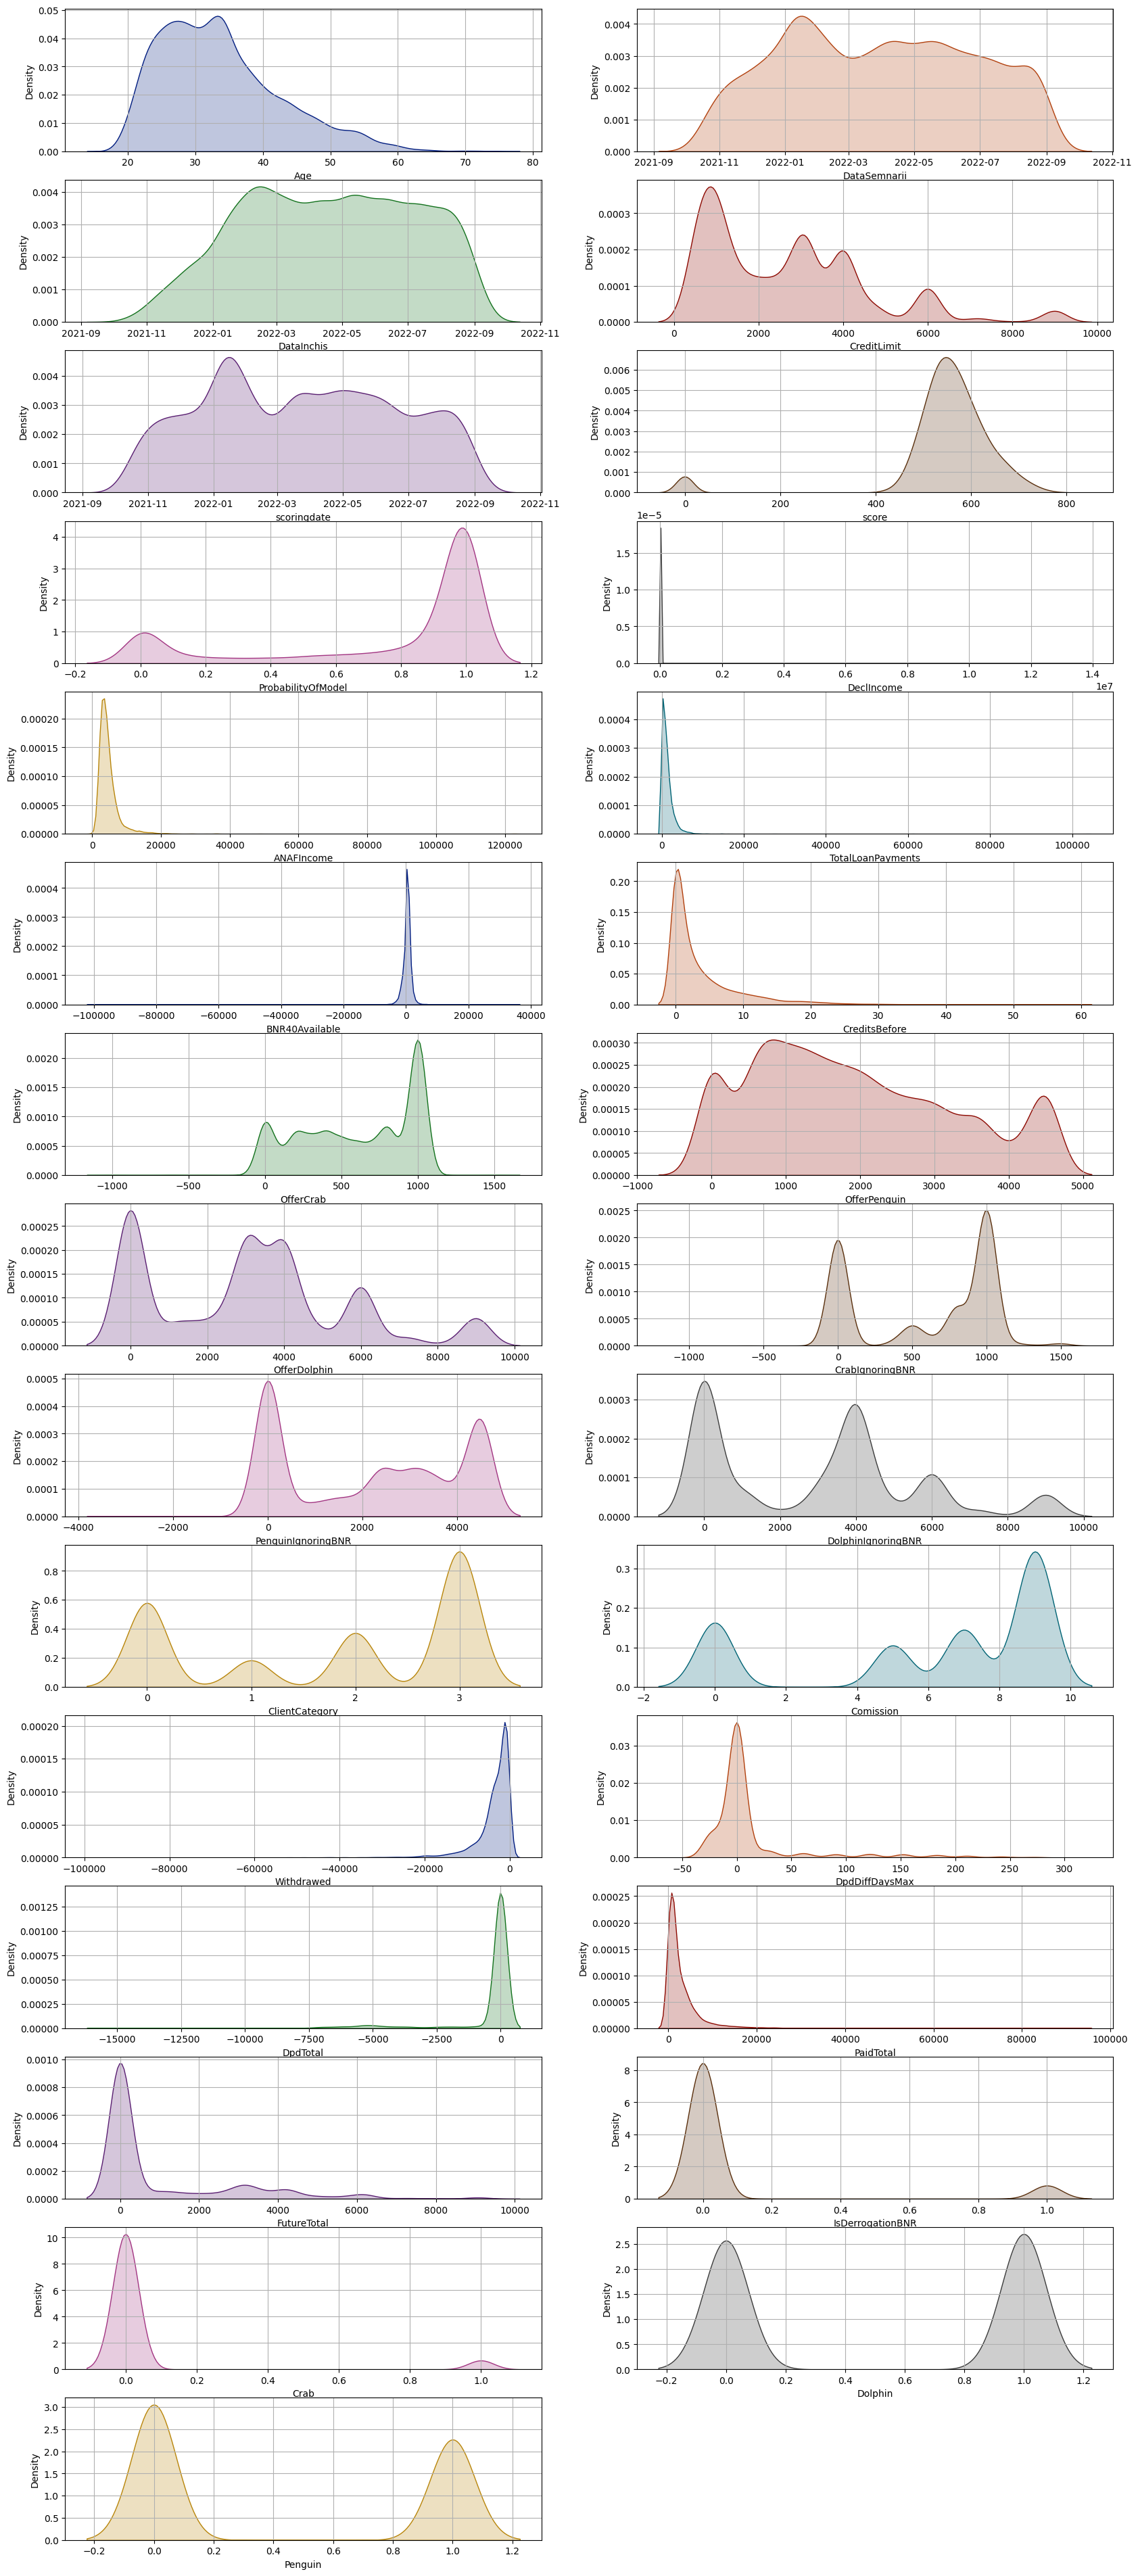

In [21]:
# Select numerical variables
numeric = df.select_dtypes(exclude=object).columns
fig, ax = plt.subplots(figsize =(20, 65))
fig.patch.set_facecolor('white')
colors = sns.color_palette("dark", n_colors=30).as_hex()

for i in (enumerate(numeric)):
    plt.subplot(20, 2, i[0]+1)
    sns.kdeplot(x = i[1], data = df, color=colors[i[0]], fill=True)
    plt.grid()
plt.show

In [22]:
df.columns

Index(['Gender', 'Age', 'DataSemnarii', 'DataInchis', 'CreditLimit', 'State',
       'scoringdate', 'score', 'ProbabilityOfModel', 'DeclIncome',
       'ANAFIncome', 'TotalLoanPayments', 'BNR40Available', 'CreditsBefore',
       'OfferCrab', 'OfferPenguin', 'OfferDolphin', 'CrabIgnoringBNR',
       'PenguinIgnoringBNR', 'DolphinIgnoringBNR', 'ClientCategory',
       'Comission', 'Withdrawed', 'DpdDiffDaysMax', 'DpdTotal', 'PaidTotal',
       'FutureTotal', 'IsDerrogationBNR', 'Crab', 'Dolphin', 'Penguin'],
      dtype='object')

#### By federal law, a late payment cannot be reported to the credit reporting bureaus until it is at least 30 days past due. An overlooked bill won't hurt your credit as long as you pay before the 30-day mark, although you may have to pay a late fee

## How many days can you be late on a payment?

### 30days 

https://www.equifax.com/personal/education/credit-cards/when-late-credit-card-payments-post/#:~:text=Generally%20speaking%2C%20the%20reporting%20date,are%2060%20days%20past%20due.

In [23]:
df.loc[(df['DpdDiffDaysMax'] > 30)& (df['IsDerrogationBNR'] ==False), ['Withdrawed', 'DpdDiffDaysMax', 'DpdTotal', 'PaidTotal',
       'FutureTotal', 'IsDerrogationBNR','State']]
# y_pinguin = df_total.loc[df_total['Produs'] == 2, 'State']
# y_delfin=df_total.loc[df_total['Produs'] == 1, 'State']

Withdrawed  DpdDiffDaysMax  DpdTotal  PaidTotal  FutureTotal  \
8        -2500.00             280  -3020.66     135.35         0.00   
10       -2100.00              64      0.00    2487.47         0.00   
19       -6000.00             273 -10028.67     671.11         0.00   
21       -3000.00             303  -5406.78      10.00         0.00   
28       -3652.21             211  -5337.73    1083.21         0.00   
...           ...             ...       ...        ...          ...   
10227     -500.00              39   -250.24     179.03       208.06   
10253    -1200.00              38  -1065.36       0.00       499.36   
10316    -1000.00              35   -880.27       0.00       416.14   
10393    -2000.00              31  -1740.51       0.00       832.26   
10413    -2200.00              31  -1904.55      10.00       915.50   

       IsDerrogationBNR      State  
8                 False  Executare  
10                False     Inchis  
19                False  Executare  
21                False  Executare  
28                False  Executare  
...                 ...        ...  
10227             False      Activ  
10253             False      Activ  
10316             False      Activ  
10393             False      Activ  
10413             False      Activ  

[1355 rows x 7 columns]

### Dupa ce in notebookul precedent am incercat sa transform coloana 'State' in target unde clienti riscanti fiind persoanele ale caror credit era in executare, iar cel inchis fiind client bun, am constientizat ca am realizat o greseala,deoare sunt si persoane ale caror credit este inchis, dar au trecut limita de 90 de zile la achitare

### De data aceasta ca clienti riscanti, vor fi cei care au creditul in executare,sau au trecut limita maxima cu 30 de zile,(contractul sa fie minim de 60 de zile,aceasta durata se va calcula din data maxima prezenta in coloana de inchidere, minus data de semnare la credit activ

In [24]:
max_datetime = df['DataInchis'].max()
df.loc[df['DataInchis'].isnull() , 'durata_contract']=(max_datetime - df['DataSemnarii']).dt.days
df.loc[df['DataInchis'].notnull() , 'durata_contract']=(df['DataInchis'] - df['DataSemnarii']).dt.days

### Am calculat durata contractului
#### Nu mai avem nevoie de datetime-uri


## Selectam clientii riscanti

In [25]:
df.loc[(df['IsDerrogationBNR'] ==False)&((df['durata_contract'] > 60) & (df['DpdDiffDaysMax'] >= 50)), 'target']=1    

In [26]:
df.loc[df['DpdDiffDaysMax'] < 30,'target']=0 # clientiti buni

In [27]:
df.loc[df['target'].isnull(),['Withdrawed', 'DpdDiffDaysMax', 'DpdTotal', 'PaidTotal',
       'FutureTotal', 'IsDerrogationBNR','durata_contract','State']]

Withdrawed  DpdDiffDaysMax  DpdTotal  PaidTotal  FutureTotal  \
171      -6939.03              37      0.00    8676.39          0.0   
174      -9254.22              30  -3560.00    7896.22          0.0   
305      -5309.74              30  -3570.00    3889.94          0.0   
337      -6000.00              30  -3160.71    6574.66          0.0   
383      -1200.00              34      0.00    1403.83          0.0   
...           ...             ...       ...        ...          ...   
11044    -3300.00              30  -3932.77     189.23          0.0   
11157    -5200.00              30  -4013.00    2000.00          0.0   
11210    -3200.00              30  -4003.00      10.00          0.0   
11263    -2200.00              30  -2836.00       0.00          0.0   
11306    -3200.00              30  -3957.00      20.00          0.0   

       IsDerrogationBNR  durata_contract   State  
171               False            226.0  Inchis  
174               False            311.0   Activ  
305               False            312.0   Activ  
337               False            311.0   Activ  
383               False            122.0  Inchis  
...                 ...              ...     ...  
11044             False             39.0   Activ  
11157             False             39.0   Activ  
11210             False             37.0   Activ  
11263             False             35.0   Activ  
11306             False             33.0   Activ  

[405 rows x 8 columns]

### Voi face drop la aceste randuri,deoarece nu reprezinta o informatie care se atribuie concret la client bun sau rau,deoarece sunt unele persoane car au 39 de zile contractul,dar dar intarziere 30 de zile,inseamna ca trebuie rambunsat dupa 9 zile,dar cel mai mic credit,crab,este de 30 de zile, de asta am cautat anterioe,daca contractul e mai lung de 60 de zile,adica 30 de zile pana la data de plata +30 de zile intarziere

#### Facem drop la coloanele datetime,deoarece am extras deja informatia necesara din ele

In [28]:
df=df.drop(['DataInchis','DataSemnarii','scoringdate'],axis=1)

In [29]:
df.isnull().sum()

Gender                  0
Age                     0
CreditLimit             0
State                   0
score                   0
ProbabilityOfModel      0
DeclIncome              0
ANAFIncome              0
TotalLoanPayments       0
BNR40Available          0
CreditsBefore           0
OfferCrab               0
OfferPenguin            0
OfferDolphin            0
CrabIgnoringBNR         0
PenguinIgnoringBNR      0
DolphinIgnoringBNR      0
ClientCategory          0
Comission               0
Withdrawed              0
DpdDiffDaysMax          0
DpdTotal                0
PaidTotal               0
FutureTotal             0
IsDerrogationBNR        0
Crab                    0
Dolphin                 0
Penguin                 0
durata_contract         0
target                405
dtype: int64

In [30]:
df=df.dropna()

In [31]:
df['IsDerrogationBNR'].value_counts()

False    11118
True       992
Name: IsDerrogationBNR, dtype: int64

### Facem drop la aceasta coloana,deoarece la aplicarea pentru credit noi nu stim daca va urma derogare,iar acest lucru poate inrautati antrenarea

In [32]:
df=df.drop('IsDerrogationBNR',axis=1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12110 entries, 0 to 12515
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              12110 non-null  object 
 1   Age                 12110 non-null  int64  
 2   CreditLimit         12110 non-null  int64  
 3   State               12110 non-null  object 
 4   score               12110 non-null  int64  
 5   ProbabilityOfModel  12110 non-null  float64
 6   DeclIncome          12110 non-null  int64  
 7   ANAFIncome          12110 non-null  int64  
 8   TotalLoanPayments   12110 non-null  int64  
 9   BNR40Available      12110 non-null  int64  
 10  CreditsBefore       12110 non-null  int64  
 11  OfferCrab           12110 non-null  int64  
 12  OfferPenguin        12110 non-null  int64  
 13  OfferDolphin        12110 non-null  int64  
 14  CrabIgnoringBNR     12110 non-null  int64  
 15  PenguinIgnoringBNR  12110 non-null  int64  
 16  Dolp

### Encodam datele categoriale

In [34]:
object_values=[]
ob_coll=df.select_dtypes(object).columns
for column in ob_coll:
     object_values.append(np.count_nonzero(df[column].value_counts()))

In [35]:
lbl_enc=LabelEncoder()
df[ob_coll]=df[ob_coll].astype(str).apply(lbl_enc.fit_transform)

<Axes: >

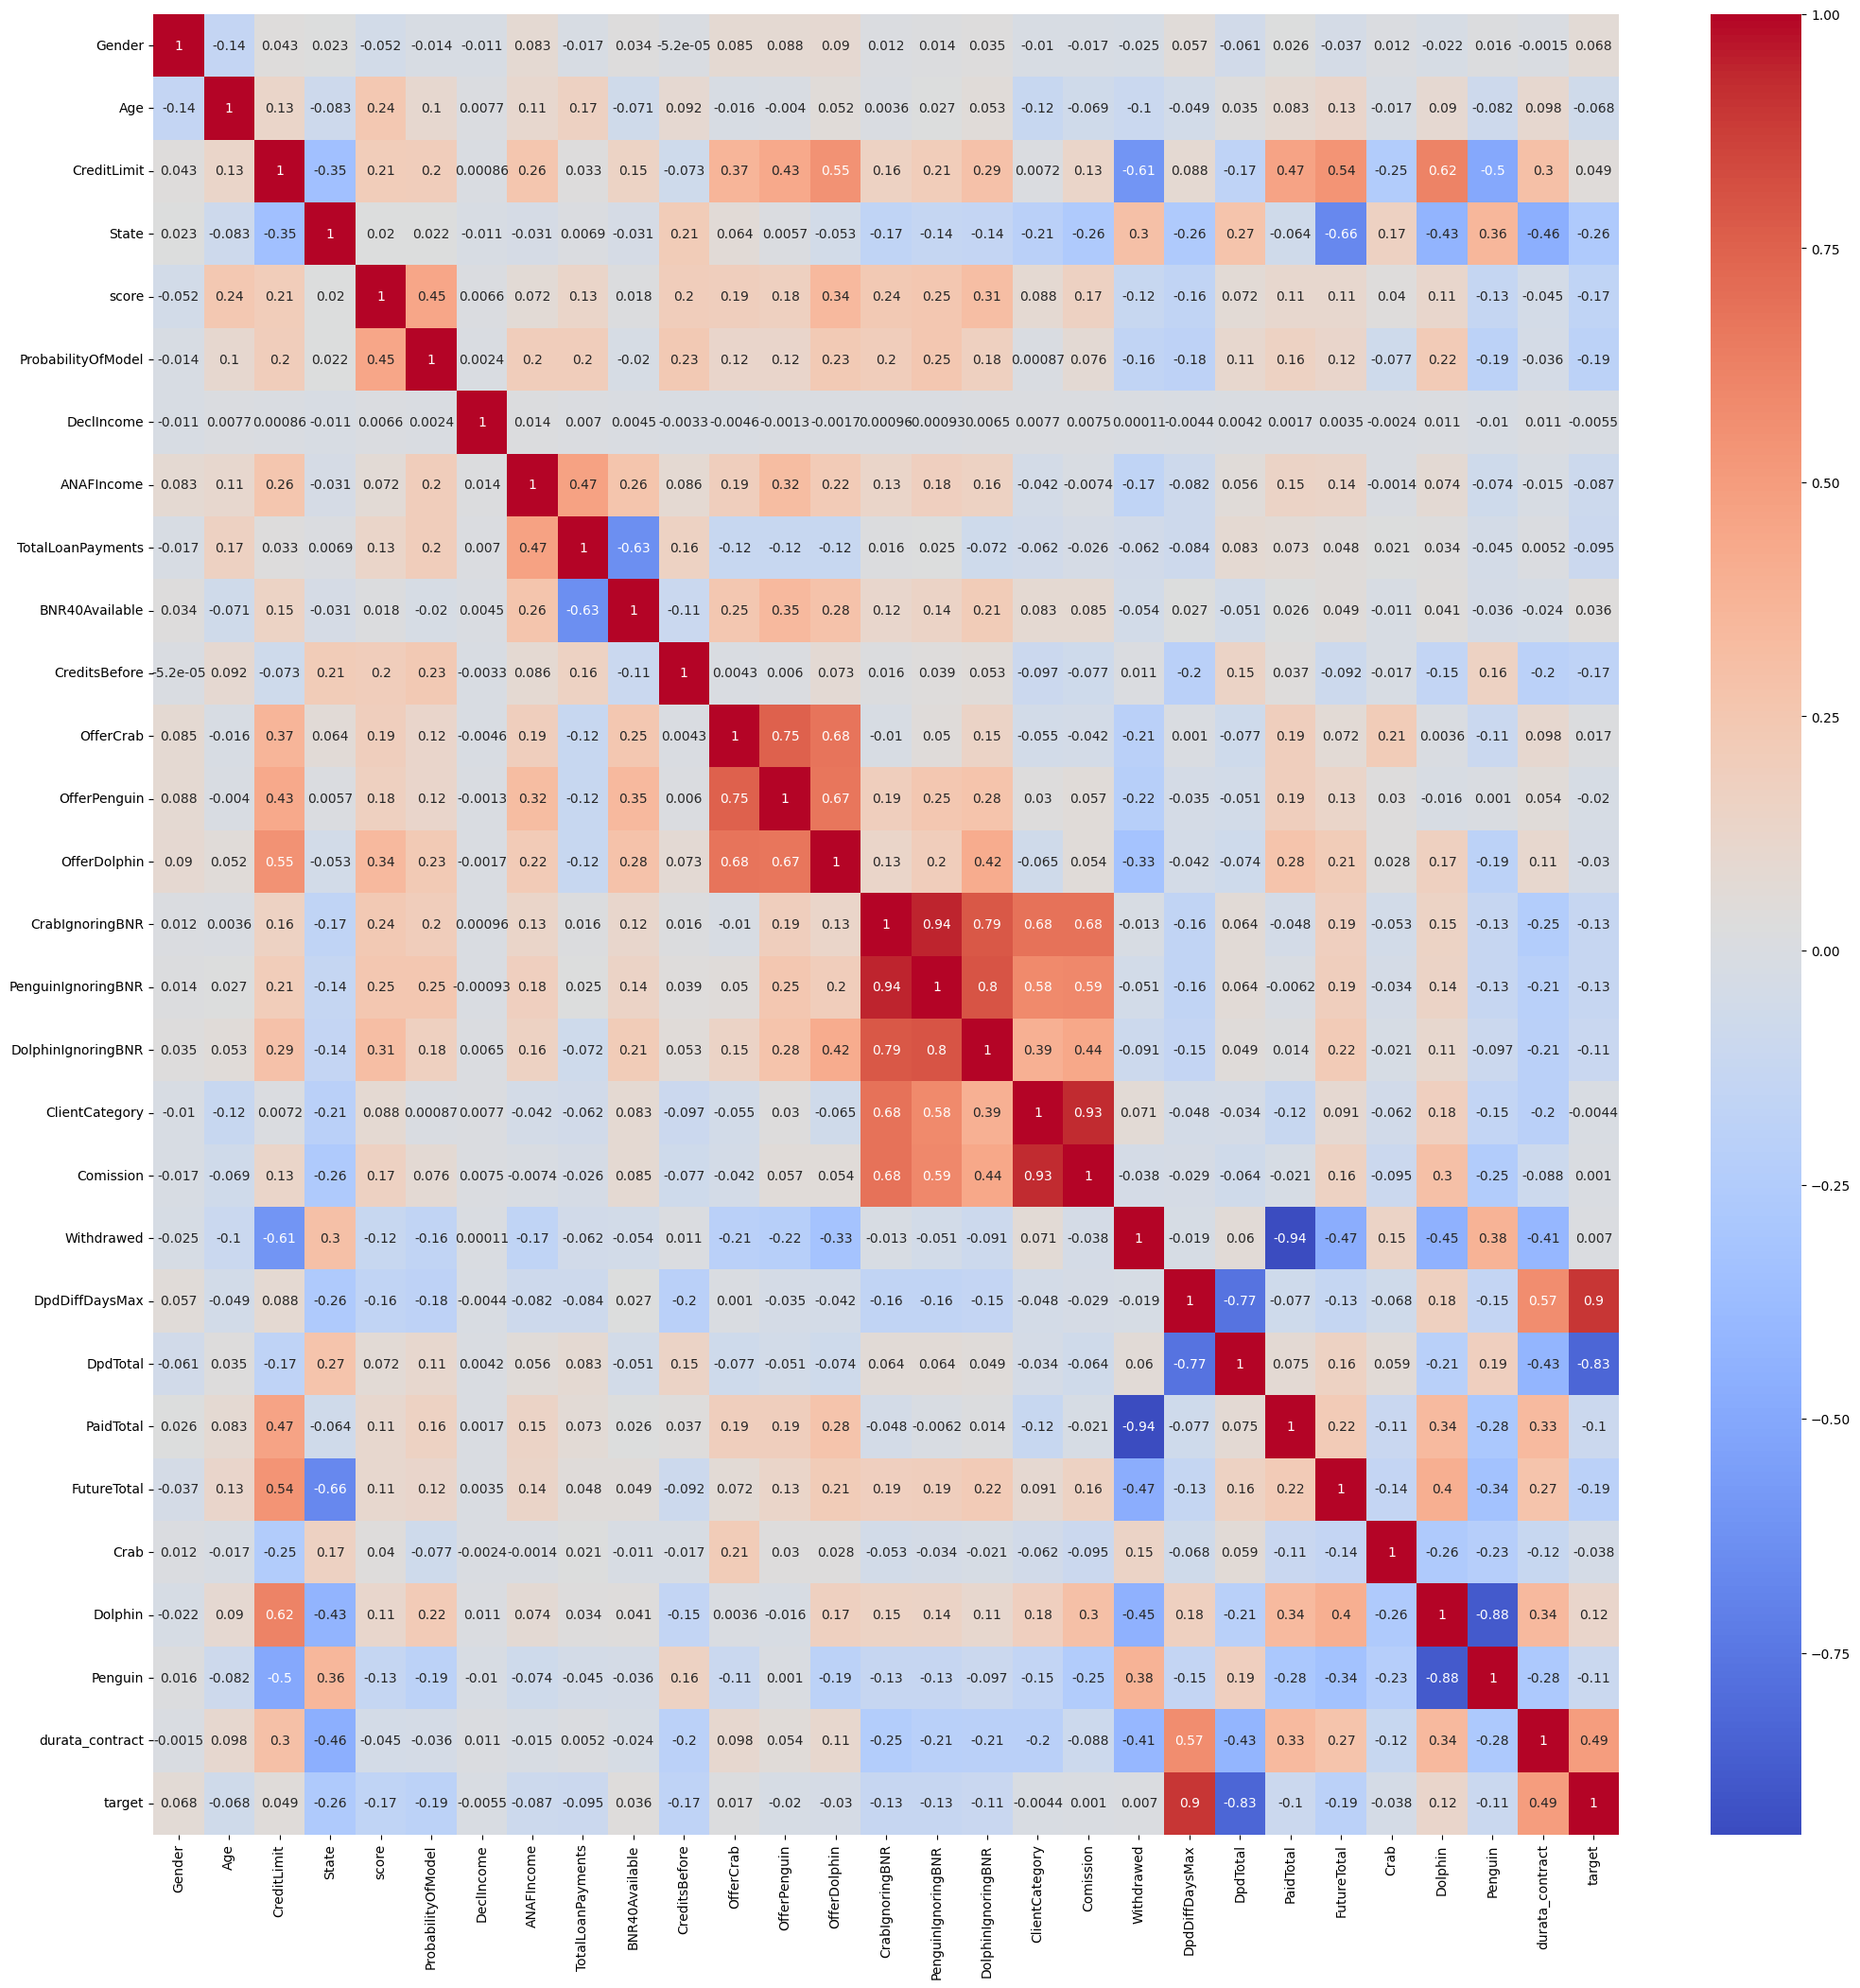

In [36]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### Deoarece clientii sunt clasificati in baza intarzierii,vom face drop la coloanele de DPD

In [37]:
df=df.drop(['DpdDiffDaysMax','DpdTotal'],axis=1)

In [38]:
work_df=df

In [39]:
print(f'Dolphin risk statistic: {round((1016/52.35),2)}\n'
     f'Peguin risk statistic: {round((427/48.98),2)}\n'
     f'Crab risk statistic: {round((52/7.19),2)}')

Dolphin risk statistic: 19.41
Peguin risk statistic: 8.72
Crab risk statistic: 7.23


### Dupa statistica 19% din clientii delfin,au o intarziere riscanta

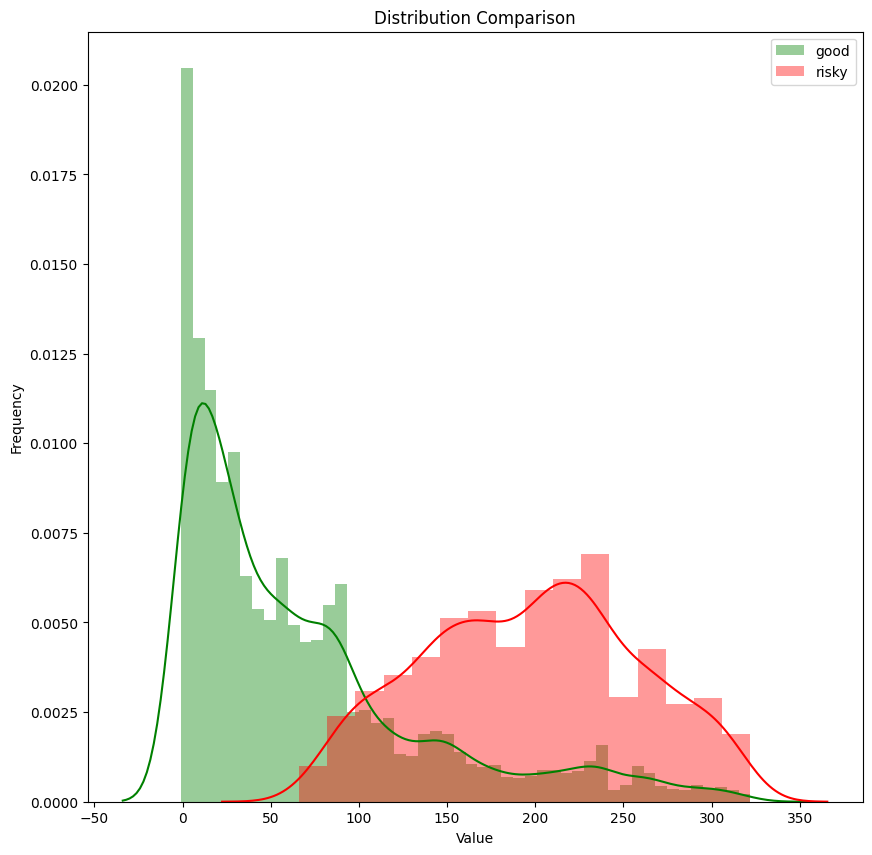

In [40]:
plt.figure(figsize=(10,10))
#sns.kdeplot(df['durata_contract'], shade=True, label='Distribution durata and target')
#sns.kdeplot(df['target'], shade=True, label='Distribution durata and target')
sns.distplot(df['durata_contract'][df['target']==0],color='g', label = 'good')
sns.distplot(df['durata_contract'][df['target']==1],color='r', label = 'risky')
#sns.kdeplot(df['target'], shade=True, label='Distribution durata and target')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution Comparison')
plt.legend()

plt.show()

### Observam ca cu cat durata contractului e mai mare cu atat si numarul de clienti riscanti creste

In [45]:
df.columns

Index(['Gender', 'Age', 'CreditLimit', 'State', 'score', 'ProbabilityOfModel',
       'DeclIncome', 'ANAFIncome', 'TotalLoanPayments', 'BNR40Available',
       'CreditsBefore', 'OfferCrab', 'OfferPenguin', 'OfferDolphin',
       'CrabIgnoringBNR', 'PenguinIgnoringBNR', 'DolphinIgnoringBNR',
       'ClientCategory', 'Comission', 'Withdrawed', 'PaidTotal', 'FutureTotal',
       'Crab', 'Dolphin', 'Penguin', 'durata_contract', 'target'],
      dtype='object')

In [47]:
df_crab.columns

Index(['Gender', 'Age', 'CreditLimit', 'State', 'score', 'ProbabilityOfModel',
       'DeclIncome', 'ANAFIncome', 'TotalLoanPayments', 'BNR40Available',
       'CreditsBefore', 'OfferCrab', 'OfferPenguin', 'OfferDolphin',
       'CrabIgnoringBNR', 'PenguinIgnoringBNR', 'DolphinIgnoringBNR',
       'ClientCategory', 'Comission', 'Withdrawed', 'PaidTotal', 'FutureTotal',
       'Crab', 'Dolphin', 'Penguin', 'durata_contract', 'target'],
      dtype='object')

In [48]:
df_crab=df.loc[df['Crab']==1]
df_crab=df_crab.drop(['Dolphin','Penguin','Crab'],axis=1)
df_delfin=df.loc[df['Dolphin']==1]
df_delfin=df_delfin.drop(['Dolphin','Penguin','Crab'],axis=1)
df_pinguin=df.loc[df['Penguin']==1]
df_pinguin=df_pinguin.drop(['Dolphin','Penguin','Crab'],axis=1)

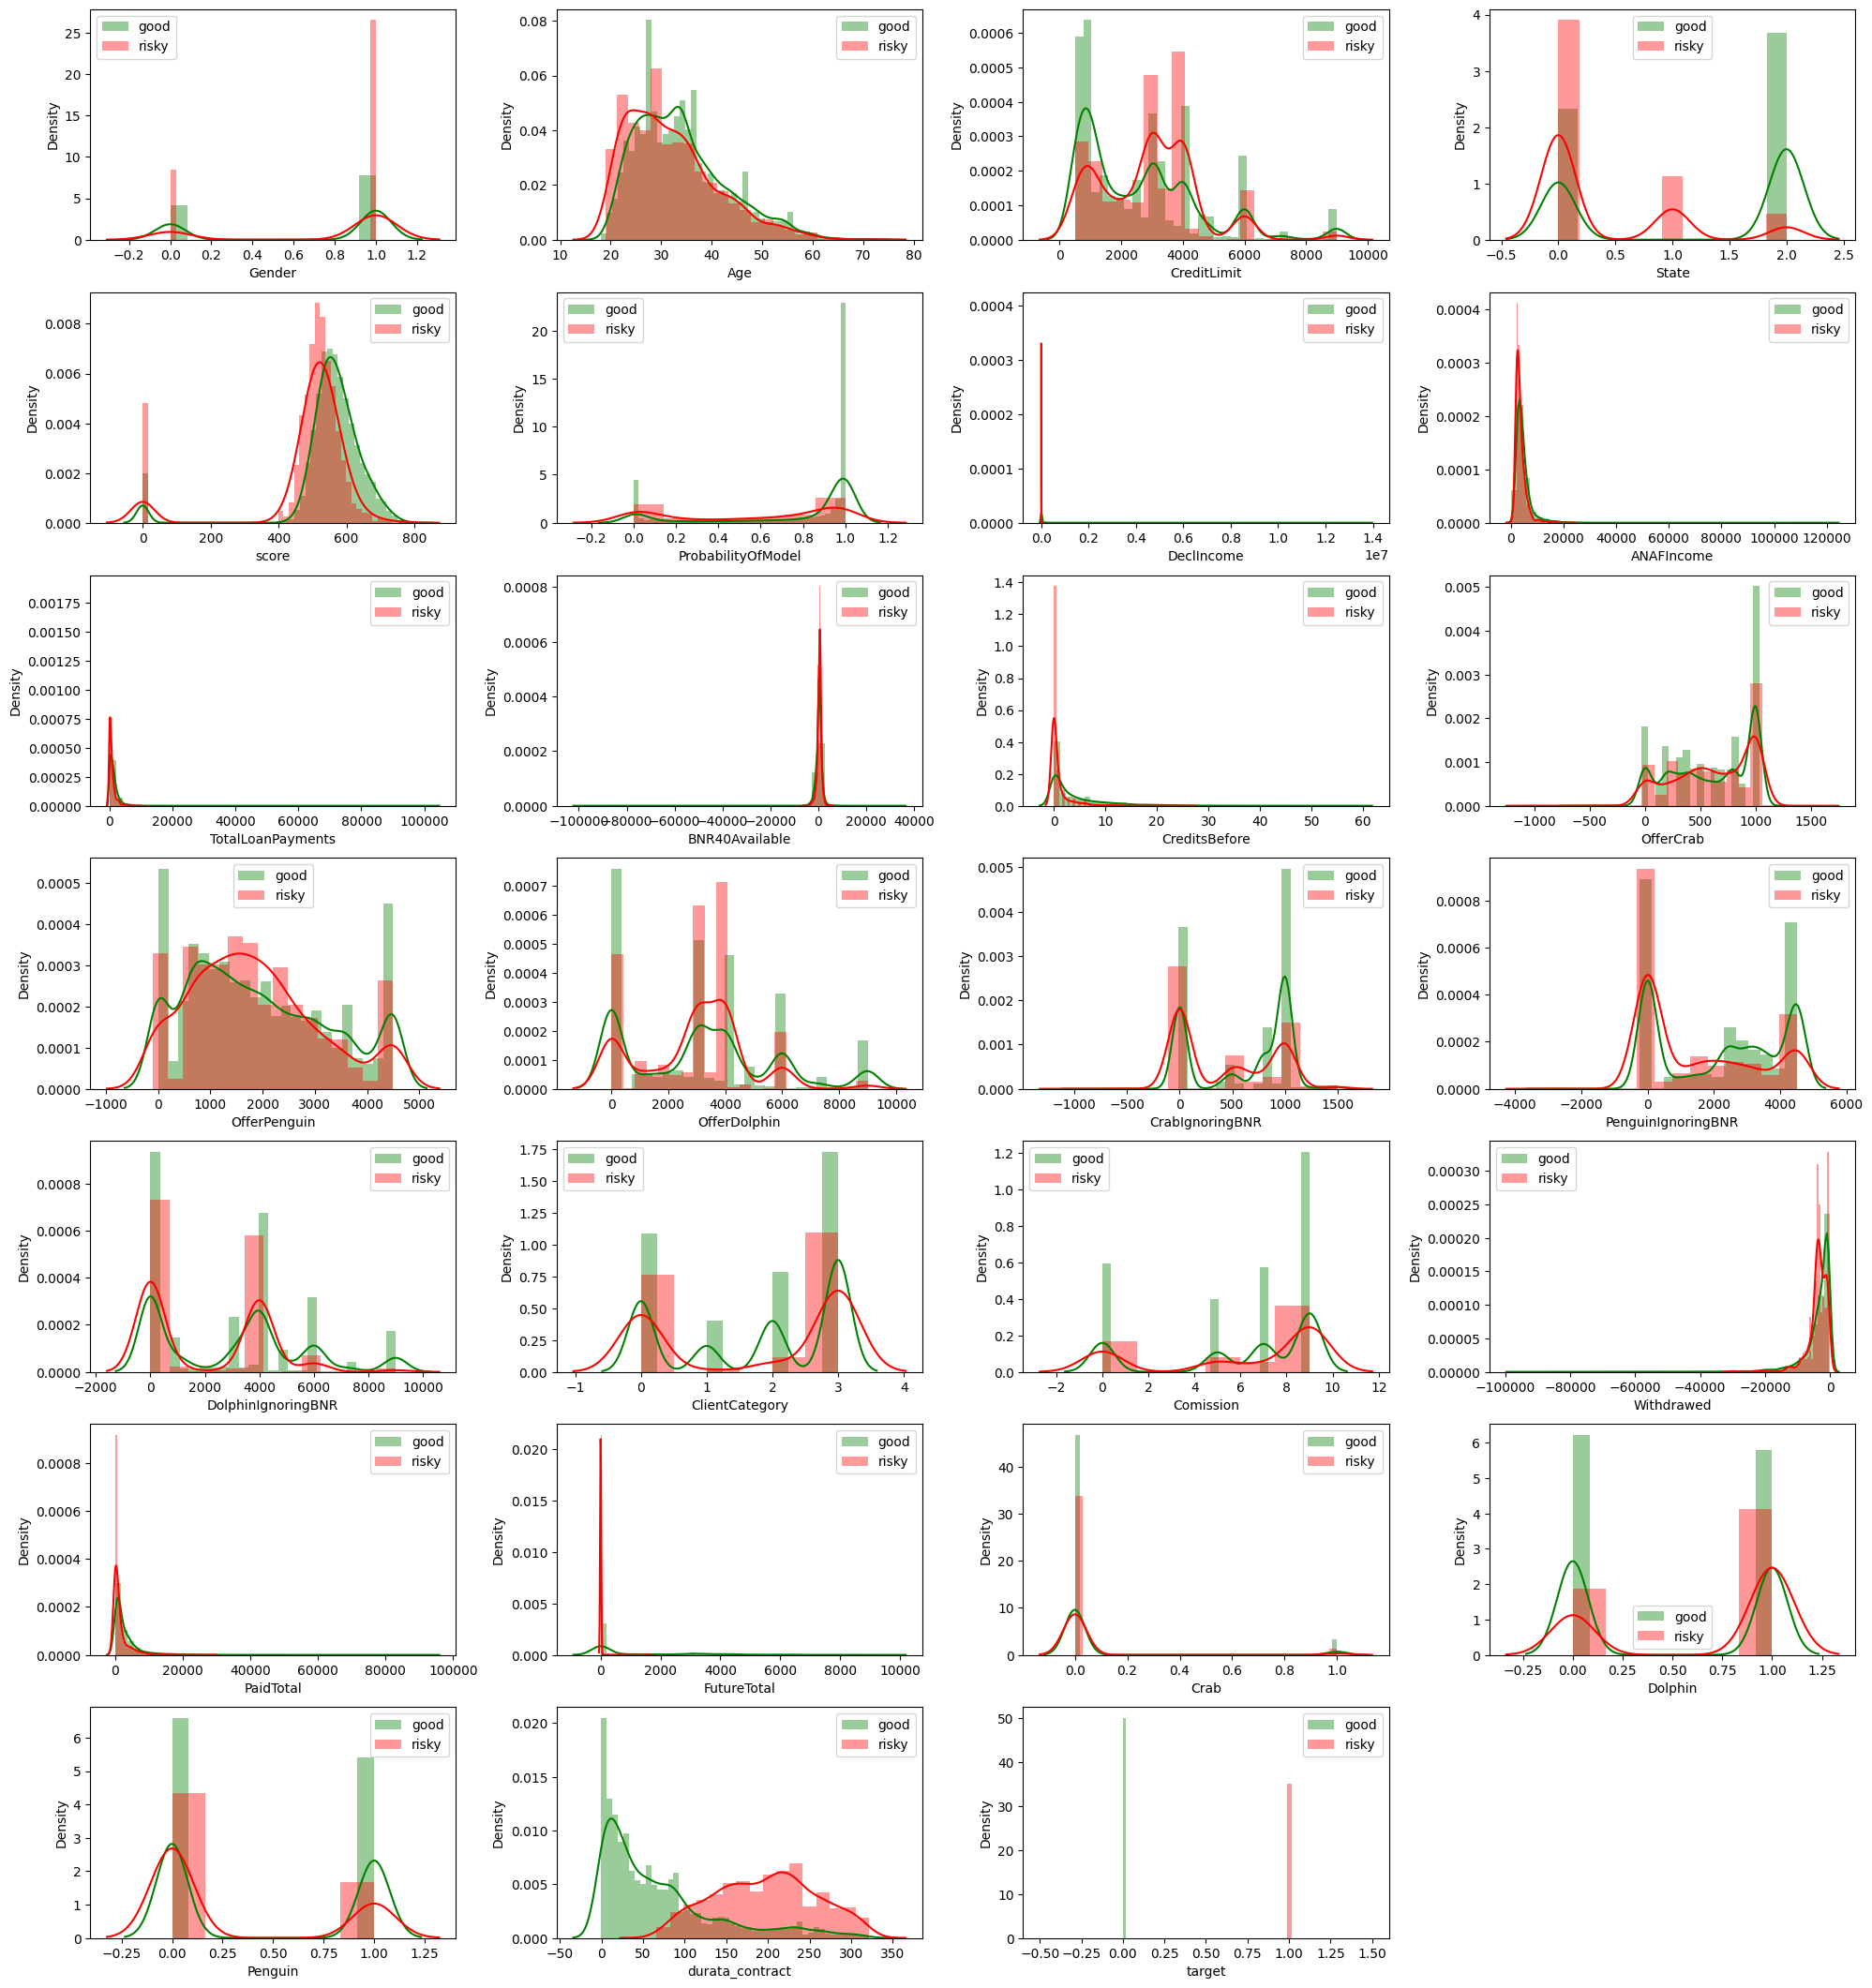

In [49]:
fig = plt.figure(figsize = (20, 25))
j = 0

for column in df:
    plt.subplot(8, 4, j+1)
    j += 1
    sns.distplot(df[column][df['target']==0],color='g', label = 'good')
    sns.distplot(df[column][df['target']==1],color='r', label = 'risky')
    plt.legend(loc='best')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()


## Analizam crabul

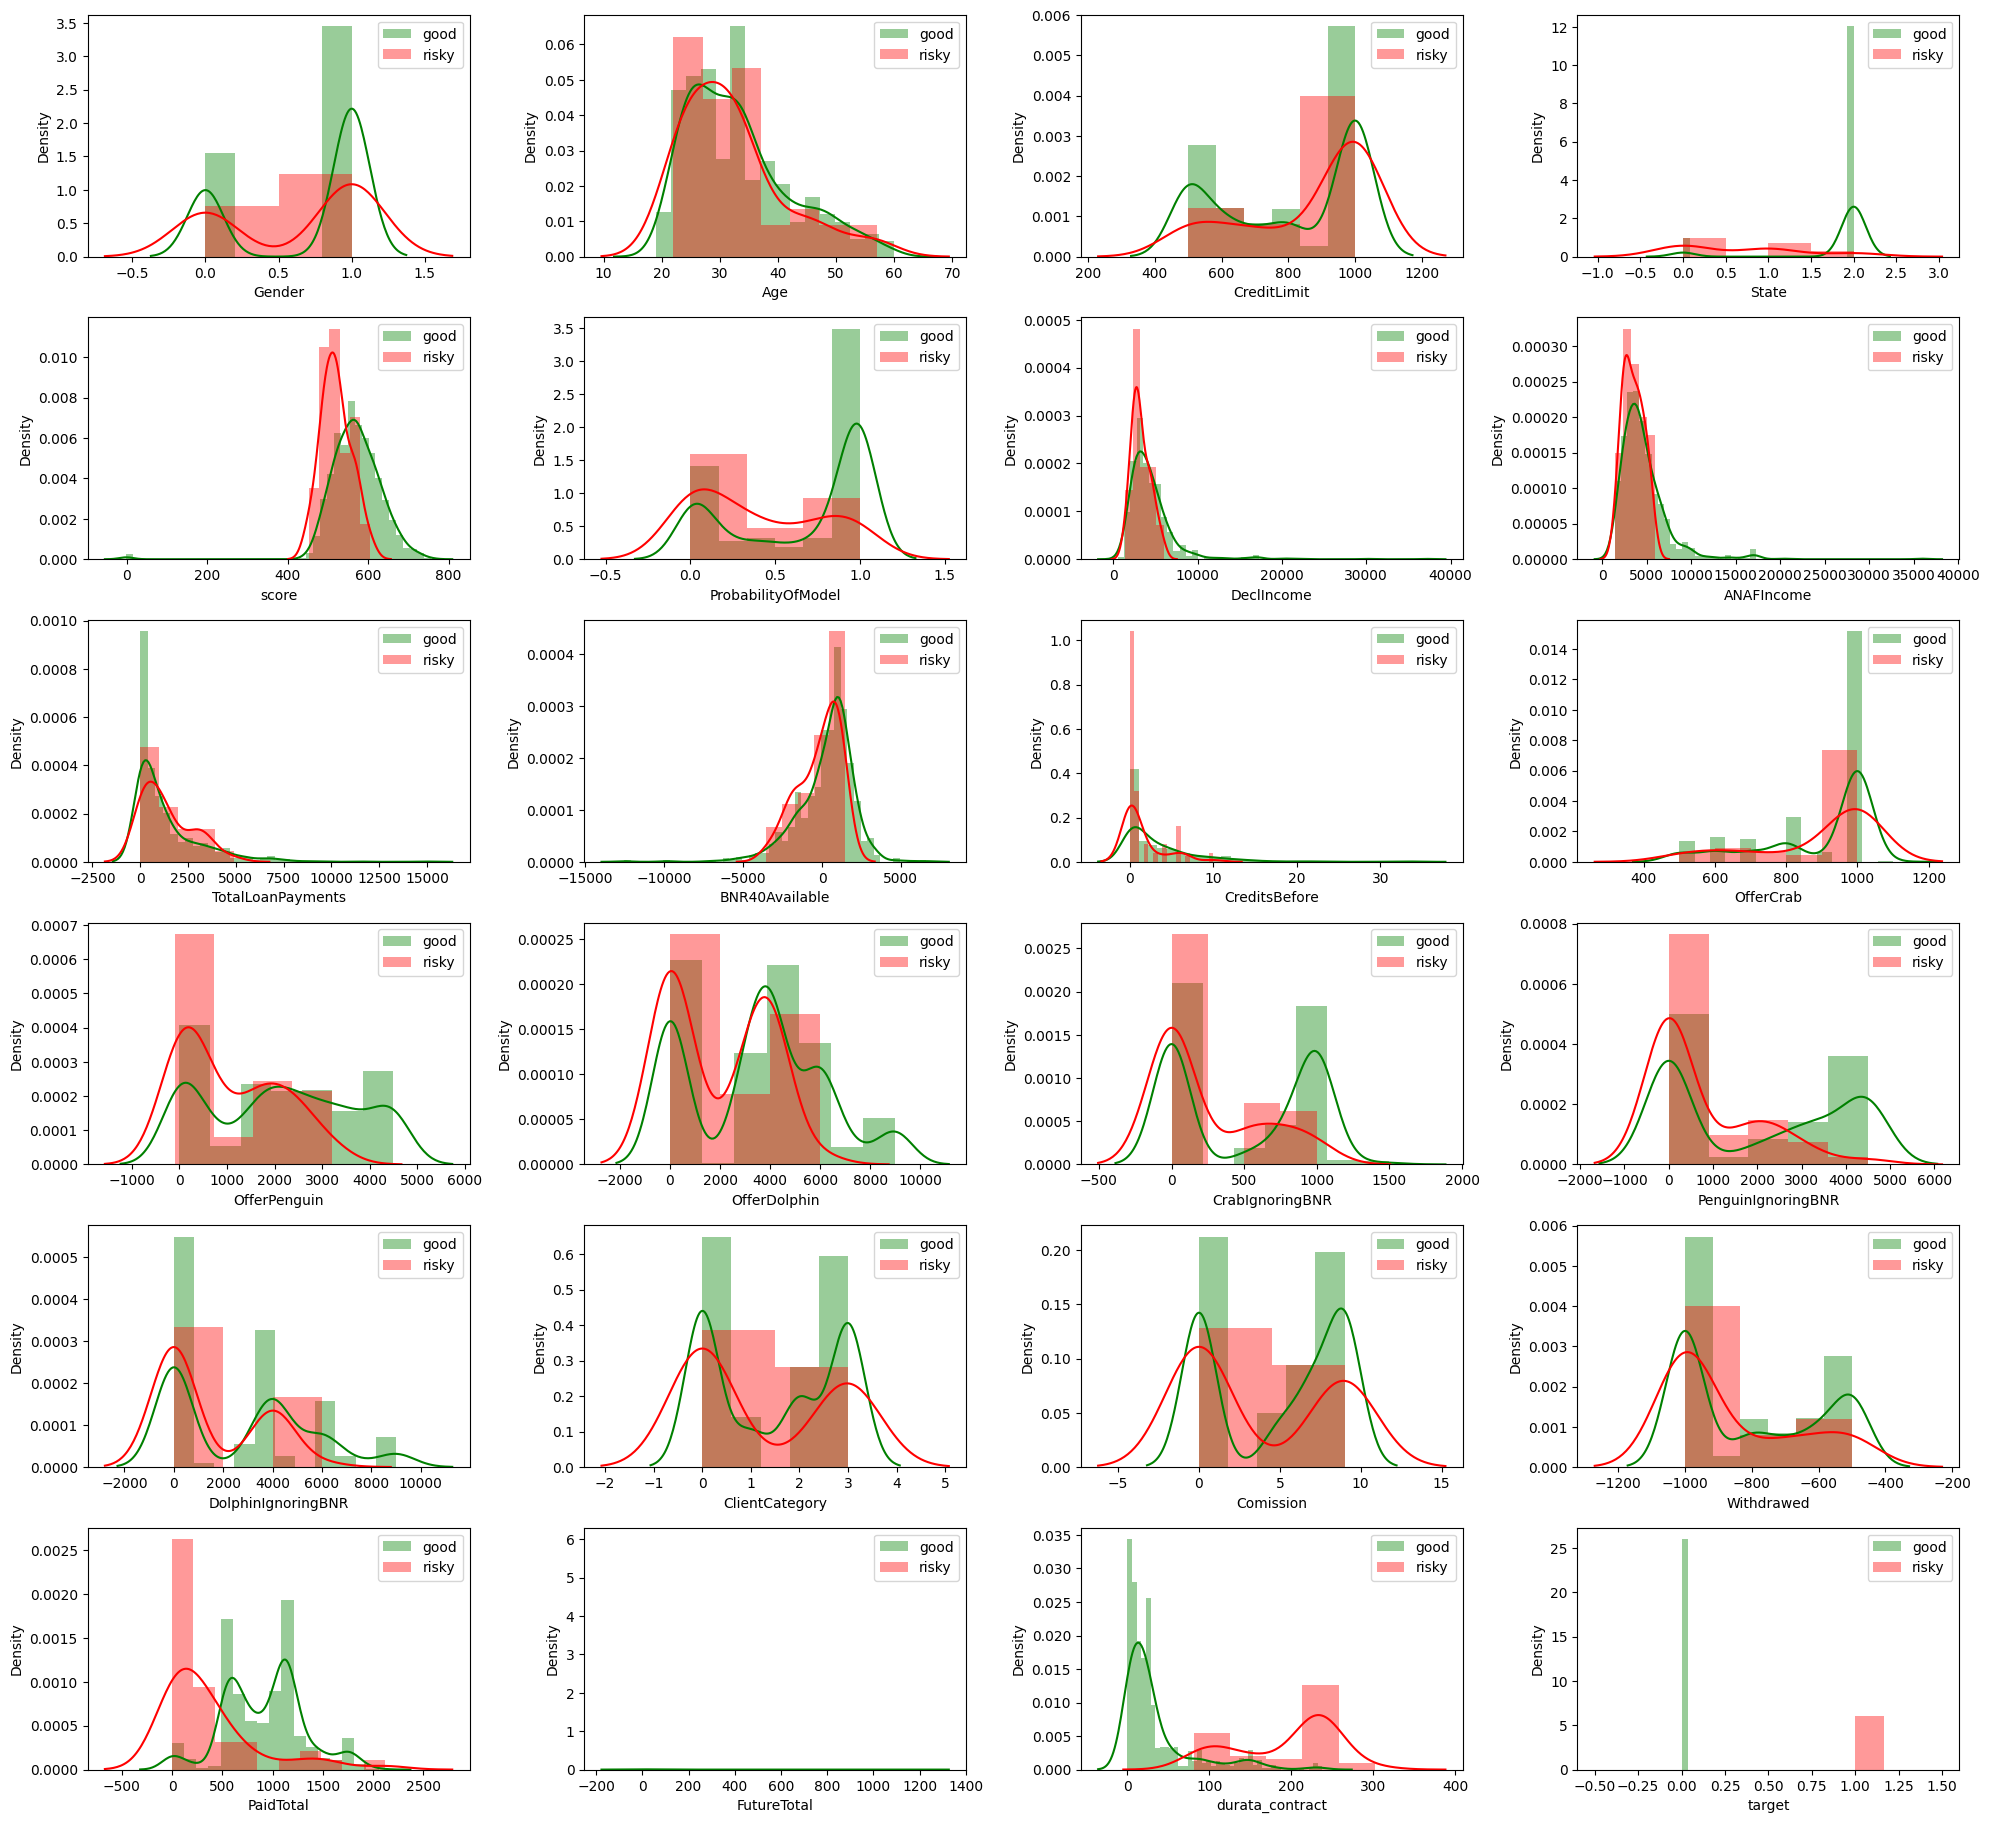

In [50]:
fig = plt.figure(figsize = (20, 25))
j = 0

for column in df_crab:
    plt.subplot(8, 4, j+1)
    j += 1
    sns.distplot(df_crab[column][df_crab['target']==0],color='g', label = 'good')
    sns.distplot(df_crab[column][df_crab['target']==1],color='r', label = 'risky')
    plt.legend(loc='best')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

### Din informatiile prezente la aplicarea pentru credit, putem observa ca persoanele cu un venit lunar mai mare de 5000, nu intalnesc dificultati cu achitarea,sau scor mai mare de 600

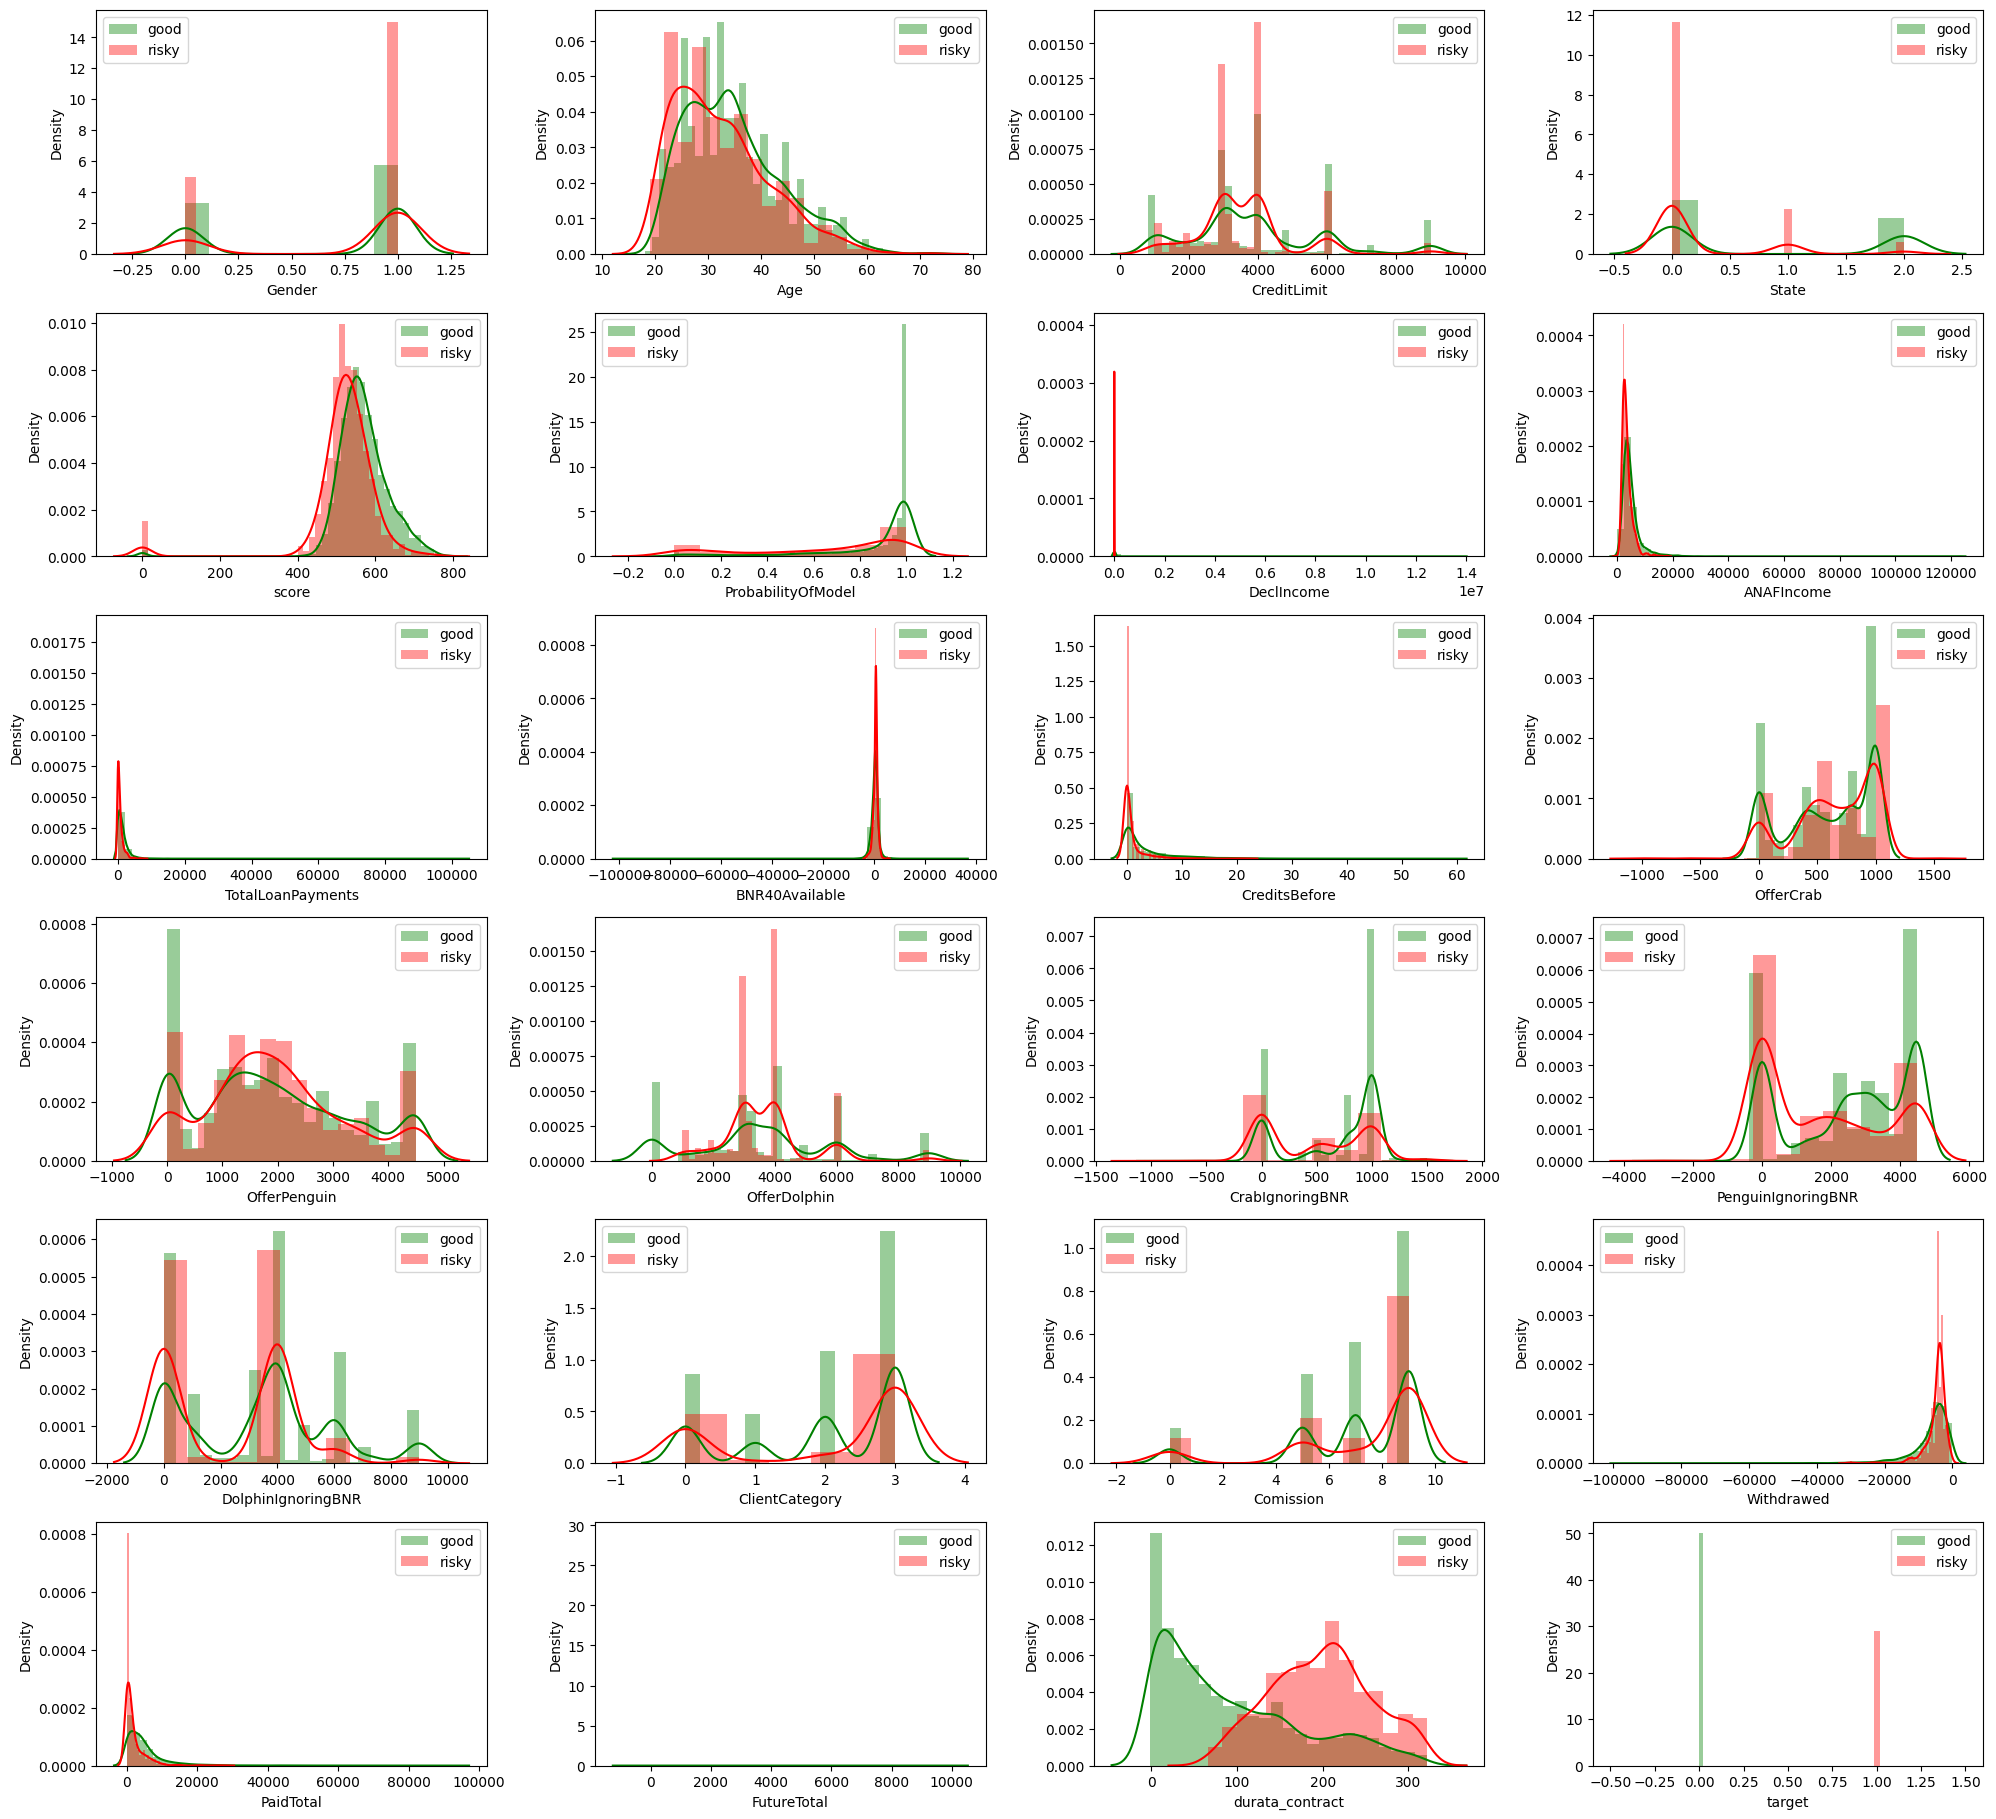

In [51]:
fig = plt.figure(figsize = (20, 25))
j = 0

for column in df_delfin:
    plt.subplot(8, 4, j+1)
    j += 1
    sns.distplot(df_delfin[column][df_delfin['target']==0],color='g', label = 'good')
    sns.distplot(df_delfin[column][df_delfin['target']==1],color='r', label = 'risky')
    plt.legend(loc='best')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

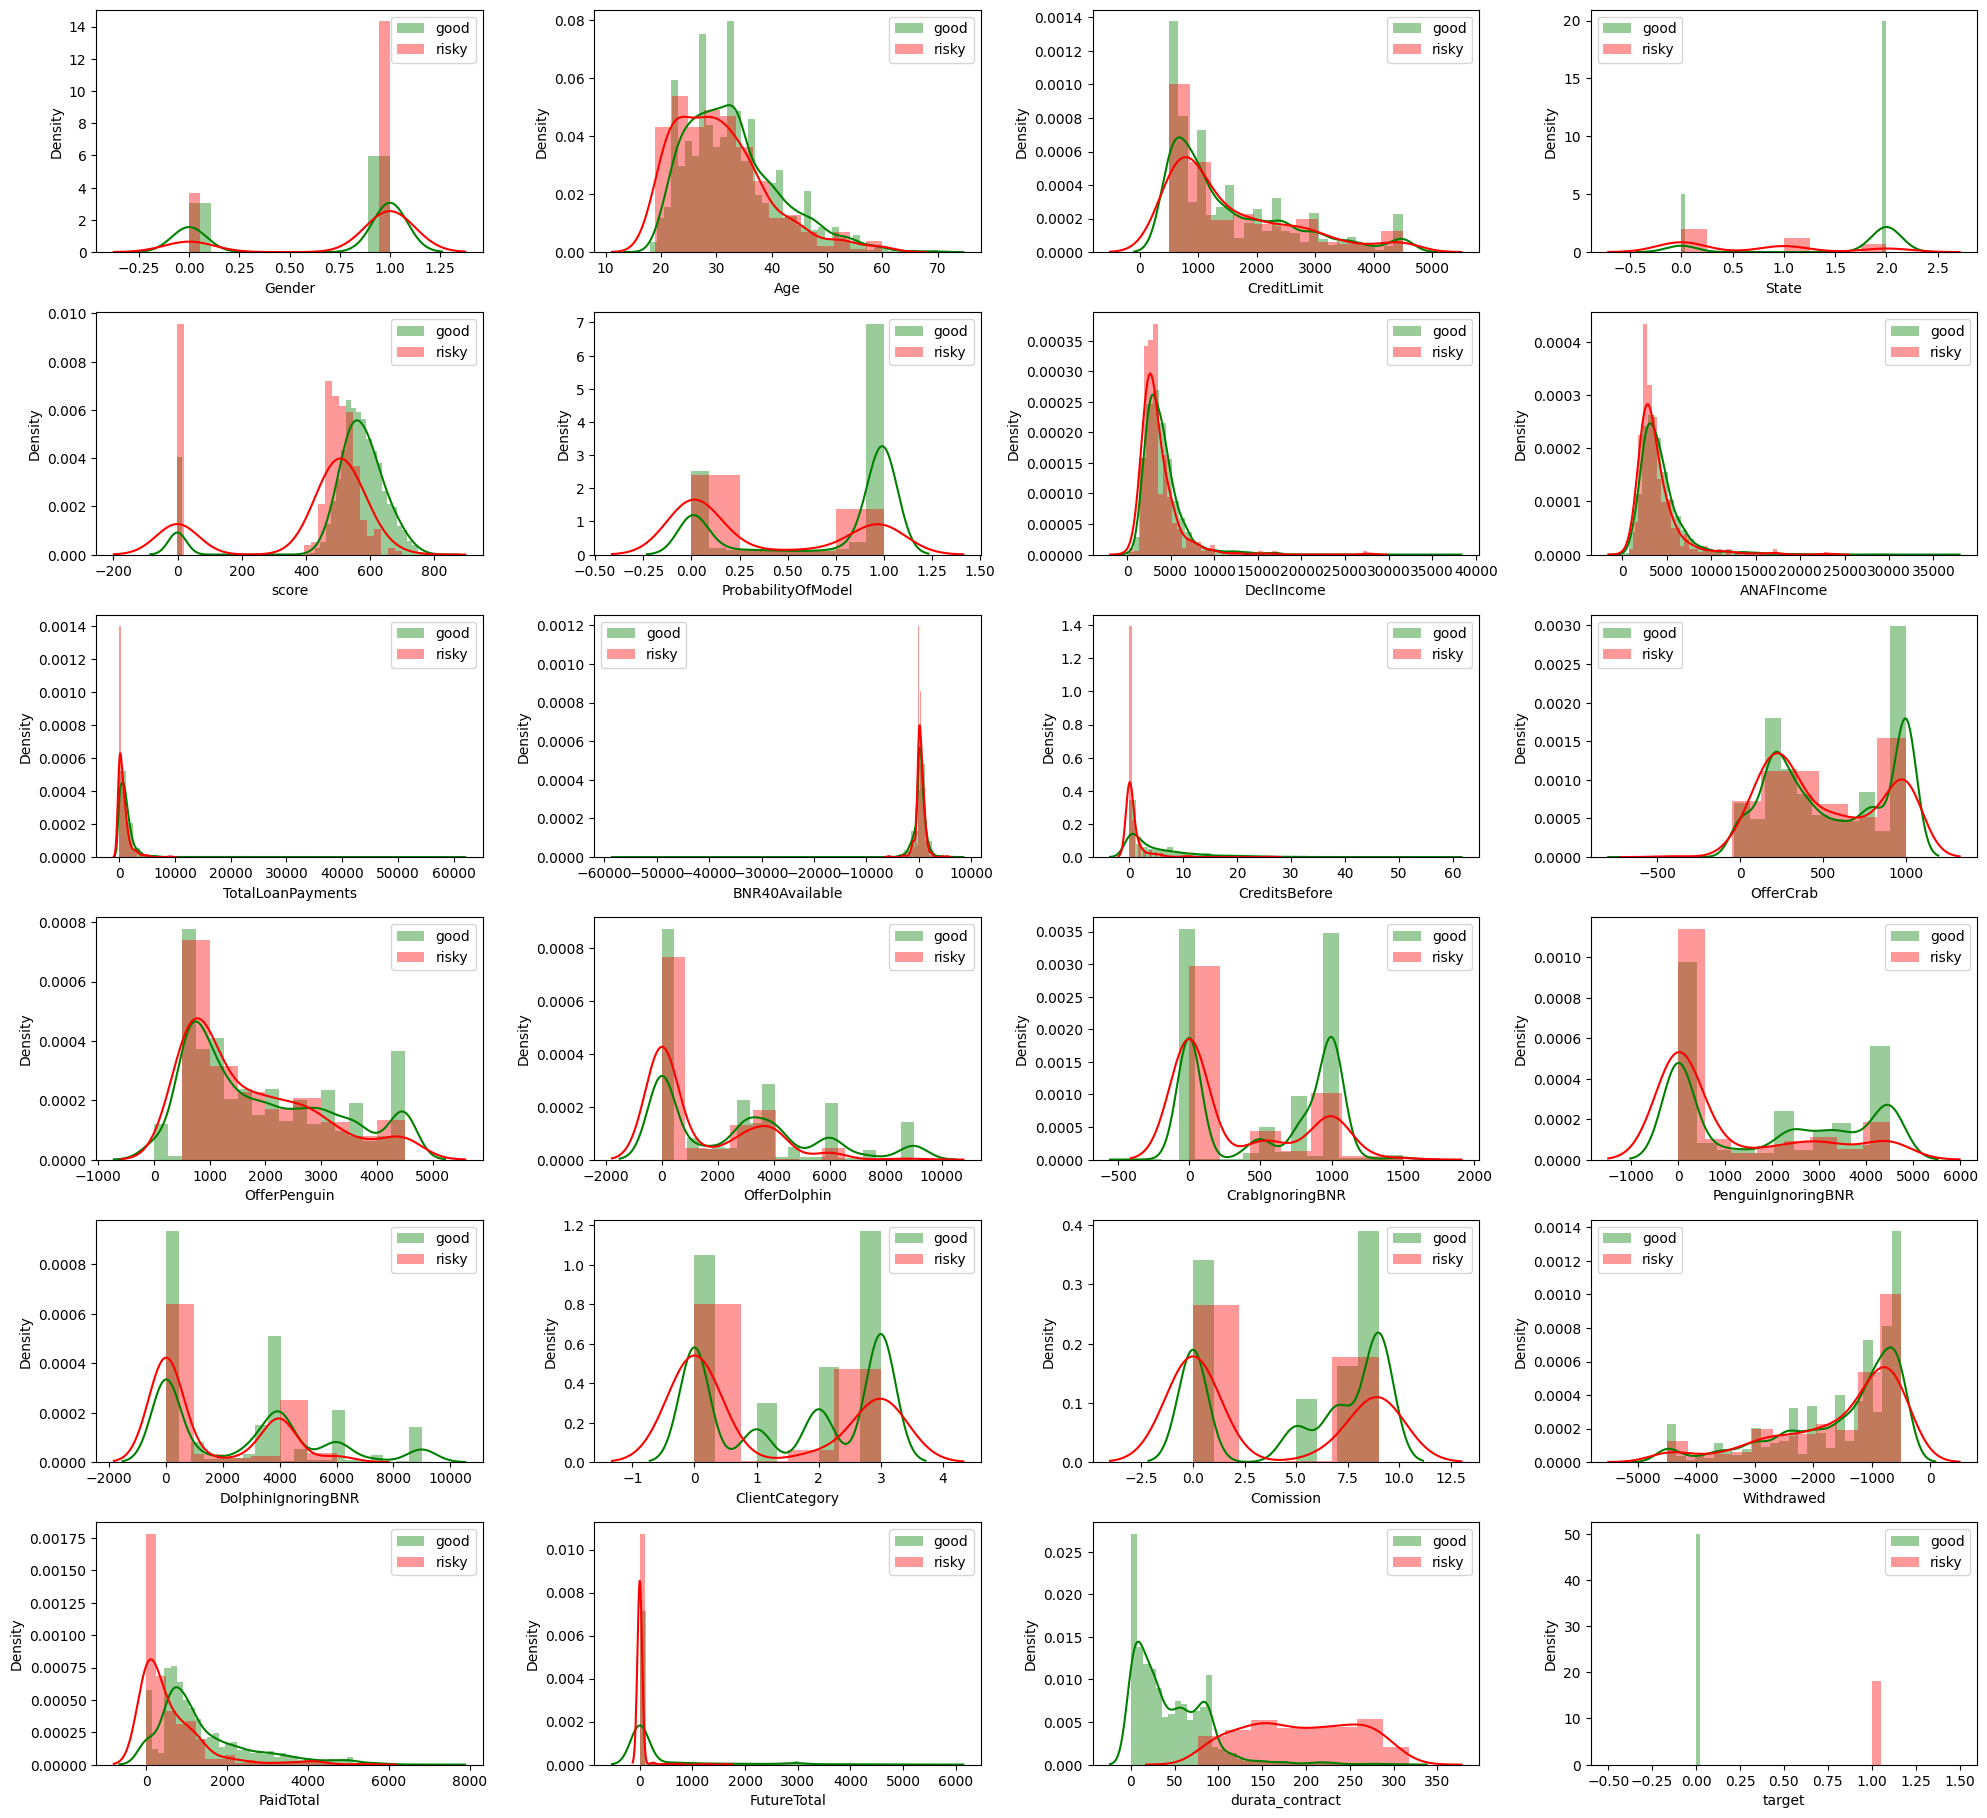

In [52]:
fig = plt.figure(figsize = (20, 25))
j = 0

for column in df_pinguin:
    plt.subplot(8, 4, j+1)
    j += 1
    sns.distplot(df_pinguin[column][df_pinguin['target']==0],color='g', label = 'good')
    sns.distplot(df_pinguin[column][df_pinguin['target']==1],color='r', label = 'risky')
    plt.legend(loc='best')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

### Cel mai mult poate separa clientii,durata contractului,asa ca deja analizam ea in comparatie cu celelalte coloane

In [53]:
df_crab.columns

Index(['Gender', 'Age', 'CreditLimit', 'State', 'score', 'ProbabilityOfModel',
       'DeclIncome', 'ANAFIncome', 'TotalLoanPayments', 'BNR40Available',
       'CreditsBefore', 'OfferCrab', 'OfferPenguin', 'OfferDolphin',
       'CrabIgnoringBNR', 'PenguinIgnoringBNR', 'DolphinIgnoringBNR',
       'ClientCategory', 'Comission', 'Withdrawed', 'PaidTotal', 'FutureTotal',
       'durata_contract', 'target'],
      dtype='object')

In [54]:
y_crab=df_crab['target']
X_crab=df_crab.drop(['State','CreditLimit','ProbabilityOfModel', 'OfferPenguin',
       'OfferDolphin','PenguinIgnoringBNR','DolphinIgnoringBNR', 'ClientCategory', 'Comission', 'Withdrawed',
       'PaidTotal', 'FutureTotal', 'durata_contract', 'target','DeclIncome'],axis=1)

In [55]:
y_delfin=df_delfin['target']
X_delfin=df_delfin.drop(['State','CreditLimit','ProbabilityOfModel', 'OfferPenguin',
       'OfferDolphin','PenguinIgnoringBNR','DolphinIgnoringBNR', 'ClientCategory', 'Comission', 'Withdrawed',
       'PaidTotal', 'FutureTotal', 'durata_contract', 'target','DeclIncome'],axis=1)

In [56]:
y_pinguin=df_pinguin['target']
X_pinguin=df_pinguin.drop(['State','CreditLimit','ProbabilityOfModel', 'OfferPenguin',
       'OfferDolphin','PenguinIgnoringBNR','DolphinIgnoringBNR', 'ClientCategory', 'Comission', 'Withdrawed',
       'PaidTotal', 'FutureTotal', 'durata_contract', 'target','DeclIncome'],axis=1)

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_crab,y_crab,test_size=0.2,random_state=42)


              precision    recall  f1-score   support

         0.0       0.97      0.64      0.77       142
         1.0       0.14      0.73      0.23        11

    accuracy                           0.65       153
   macro avg       0.55      0.68      0.50       153
weighted avg       0.91      0.65      0.73       153



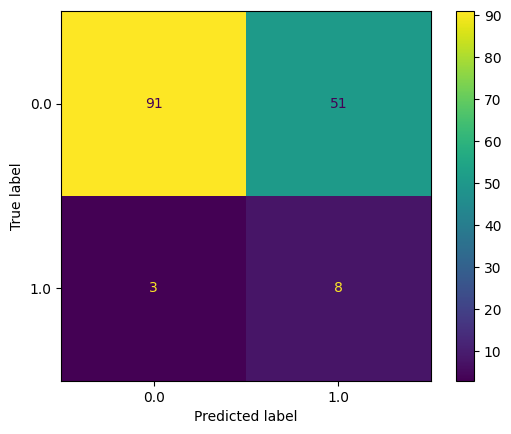

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
from sklearn.metrics import classification_report
lr_model = LogisticRegression(random_state=42,class_weight='balanced')
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       142
         1.0       0.00      0.00      0.00        11

    accuracy                           0.93       153
   macro avg       0.46      0.50      0.48       153
weighted avg       0.86      0.93      0.89       153



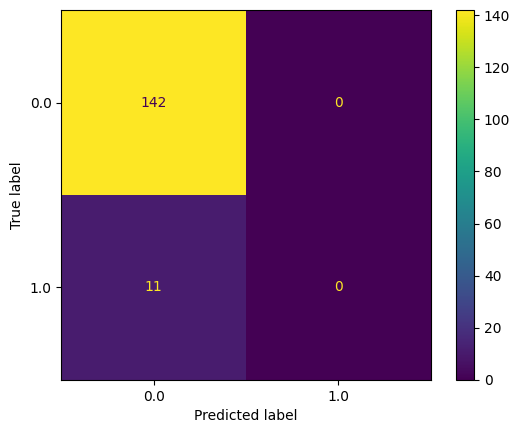

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(random_state=42,class_weight='balanced')
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.99      0.69      0.81       985
         1.0       0.16      0.86      0.26        65

    accuracy                           0.70      1050
   macro avg       0.57      0.78      0.54      1050
weighted avg       0.94      0.70      0.78      1050



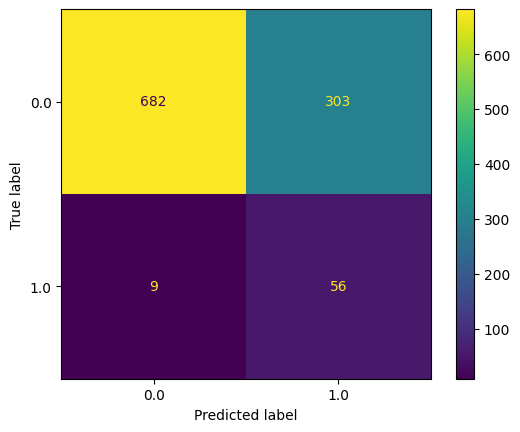

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X_pinguin,y_pinguin,test_size=0.2,random_state=42)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       985
         1.0       0.05      0.02      0.02        65

    accuracy                           0.92      1050
   macro avg       0.50      0.50      0.49      1050
weighted avg       0.88      0.92      0.90      1050



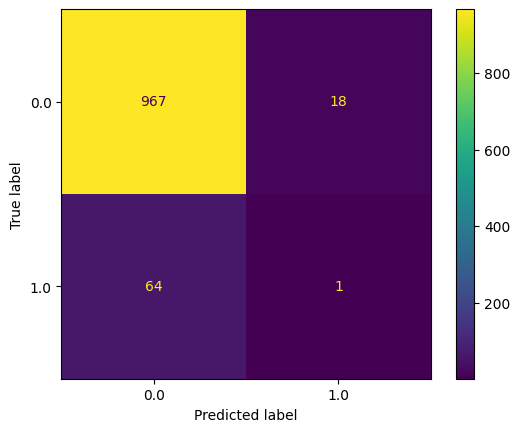

In [61]:
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1044
         1.0       0.47      0.16      0.24       176

    accuracy                           0.85      1220
   macro avg       0.67      0.56      0.58      1220
weighted avg       0.82      0.85      0.82      1220



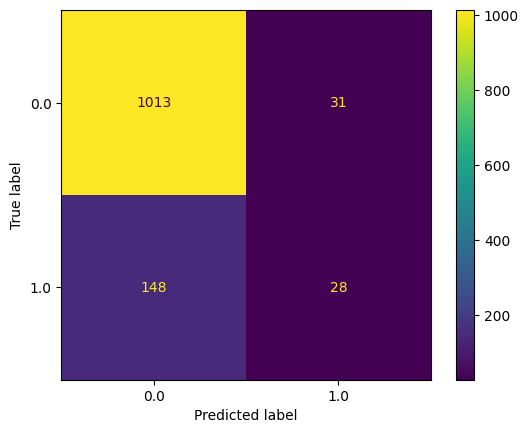

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X_delfin,y_delfin,test_size=0.2,random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.93      0.62      0.75      1044
         1.0       0.25      0.73      0.37       176

    accuracy                           0.64      1220
   macro avg       0.59      0.68      0.56      1220
weighted avg       0.83      0.64      0.69      1220



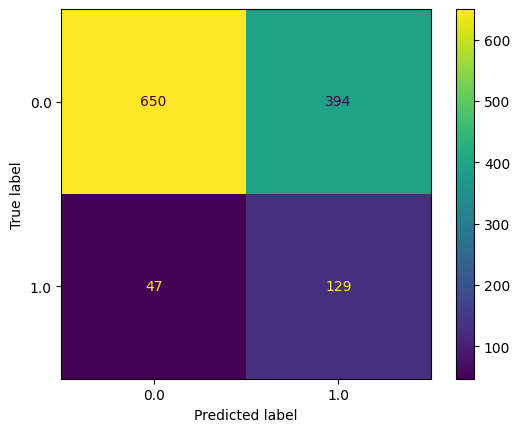

In [63]:
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))

In [64]:
df_crab_total=pd.concat([X_crab,y_crab],axis=1)


              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1044
         1.0       0.38      0.19      0.26       176

    accuracy                           0.84      1220
   macro avg       0.63      0.57      0.58      1220
weighted avg       0.80      0.84      0.81      1220



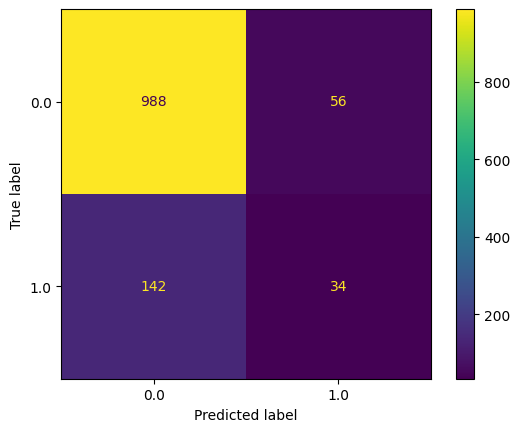

In [65]:
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(X_train, y_train)

y_pred = lgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))

In [66]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 63, 127],
    'min_child_samples': [10, 20, 30]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(lgb_classifier, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (ROC AUC):", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 20, 'num_leaves': 31}
Best Score (ROC AUC): 0.8240958201414532



              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92      1044
         1.0       0.54      0.17      0.26       176

    accuracy                           0.86      1220
   macro avg       0.71      0.57      0.59      1220
weighted avg       0.83      0.86      0.83      1220



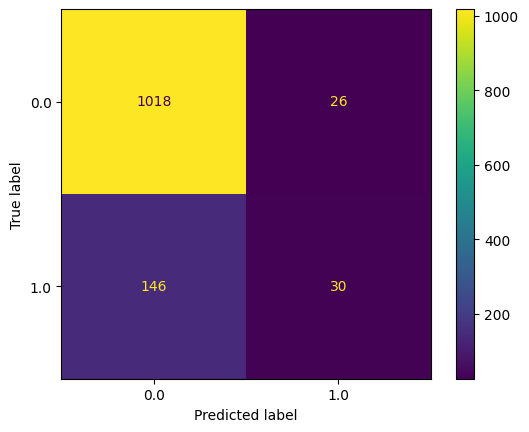

In [67]:
lgb_classifier = lgb.LGBMClassifier(learning_rate=0.1,
 max_depth= 3,
 min_child_samples=20,
 num_leaves= 31)
lgb_classifier.fit(X_train, y_train)

y_pred = lgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))

In [86]:
#X_crab=X_crab.drop(['TotalLoanPayments','OfferCrab','CrabIgnoringBNR'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X_crab,y_crab,test_size=0.2,random_state=42)


              precision    recall  f1-score   support

         0.0       0.97      0.66      0.79       142
         1.0       0.14      0.73      0.24        11

    accuracy                           0.67       153
   macro avg       0.56      0.69      0.51       153
weighted avg       0.91      0.67      0.75       153



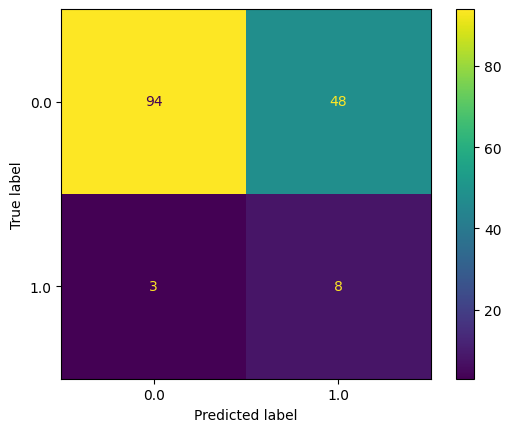

In [87]:
lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(X_train, y_train)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))

<Axes: >

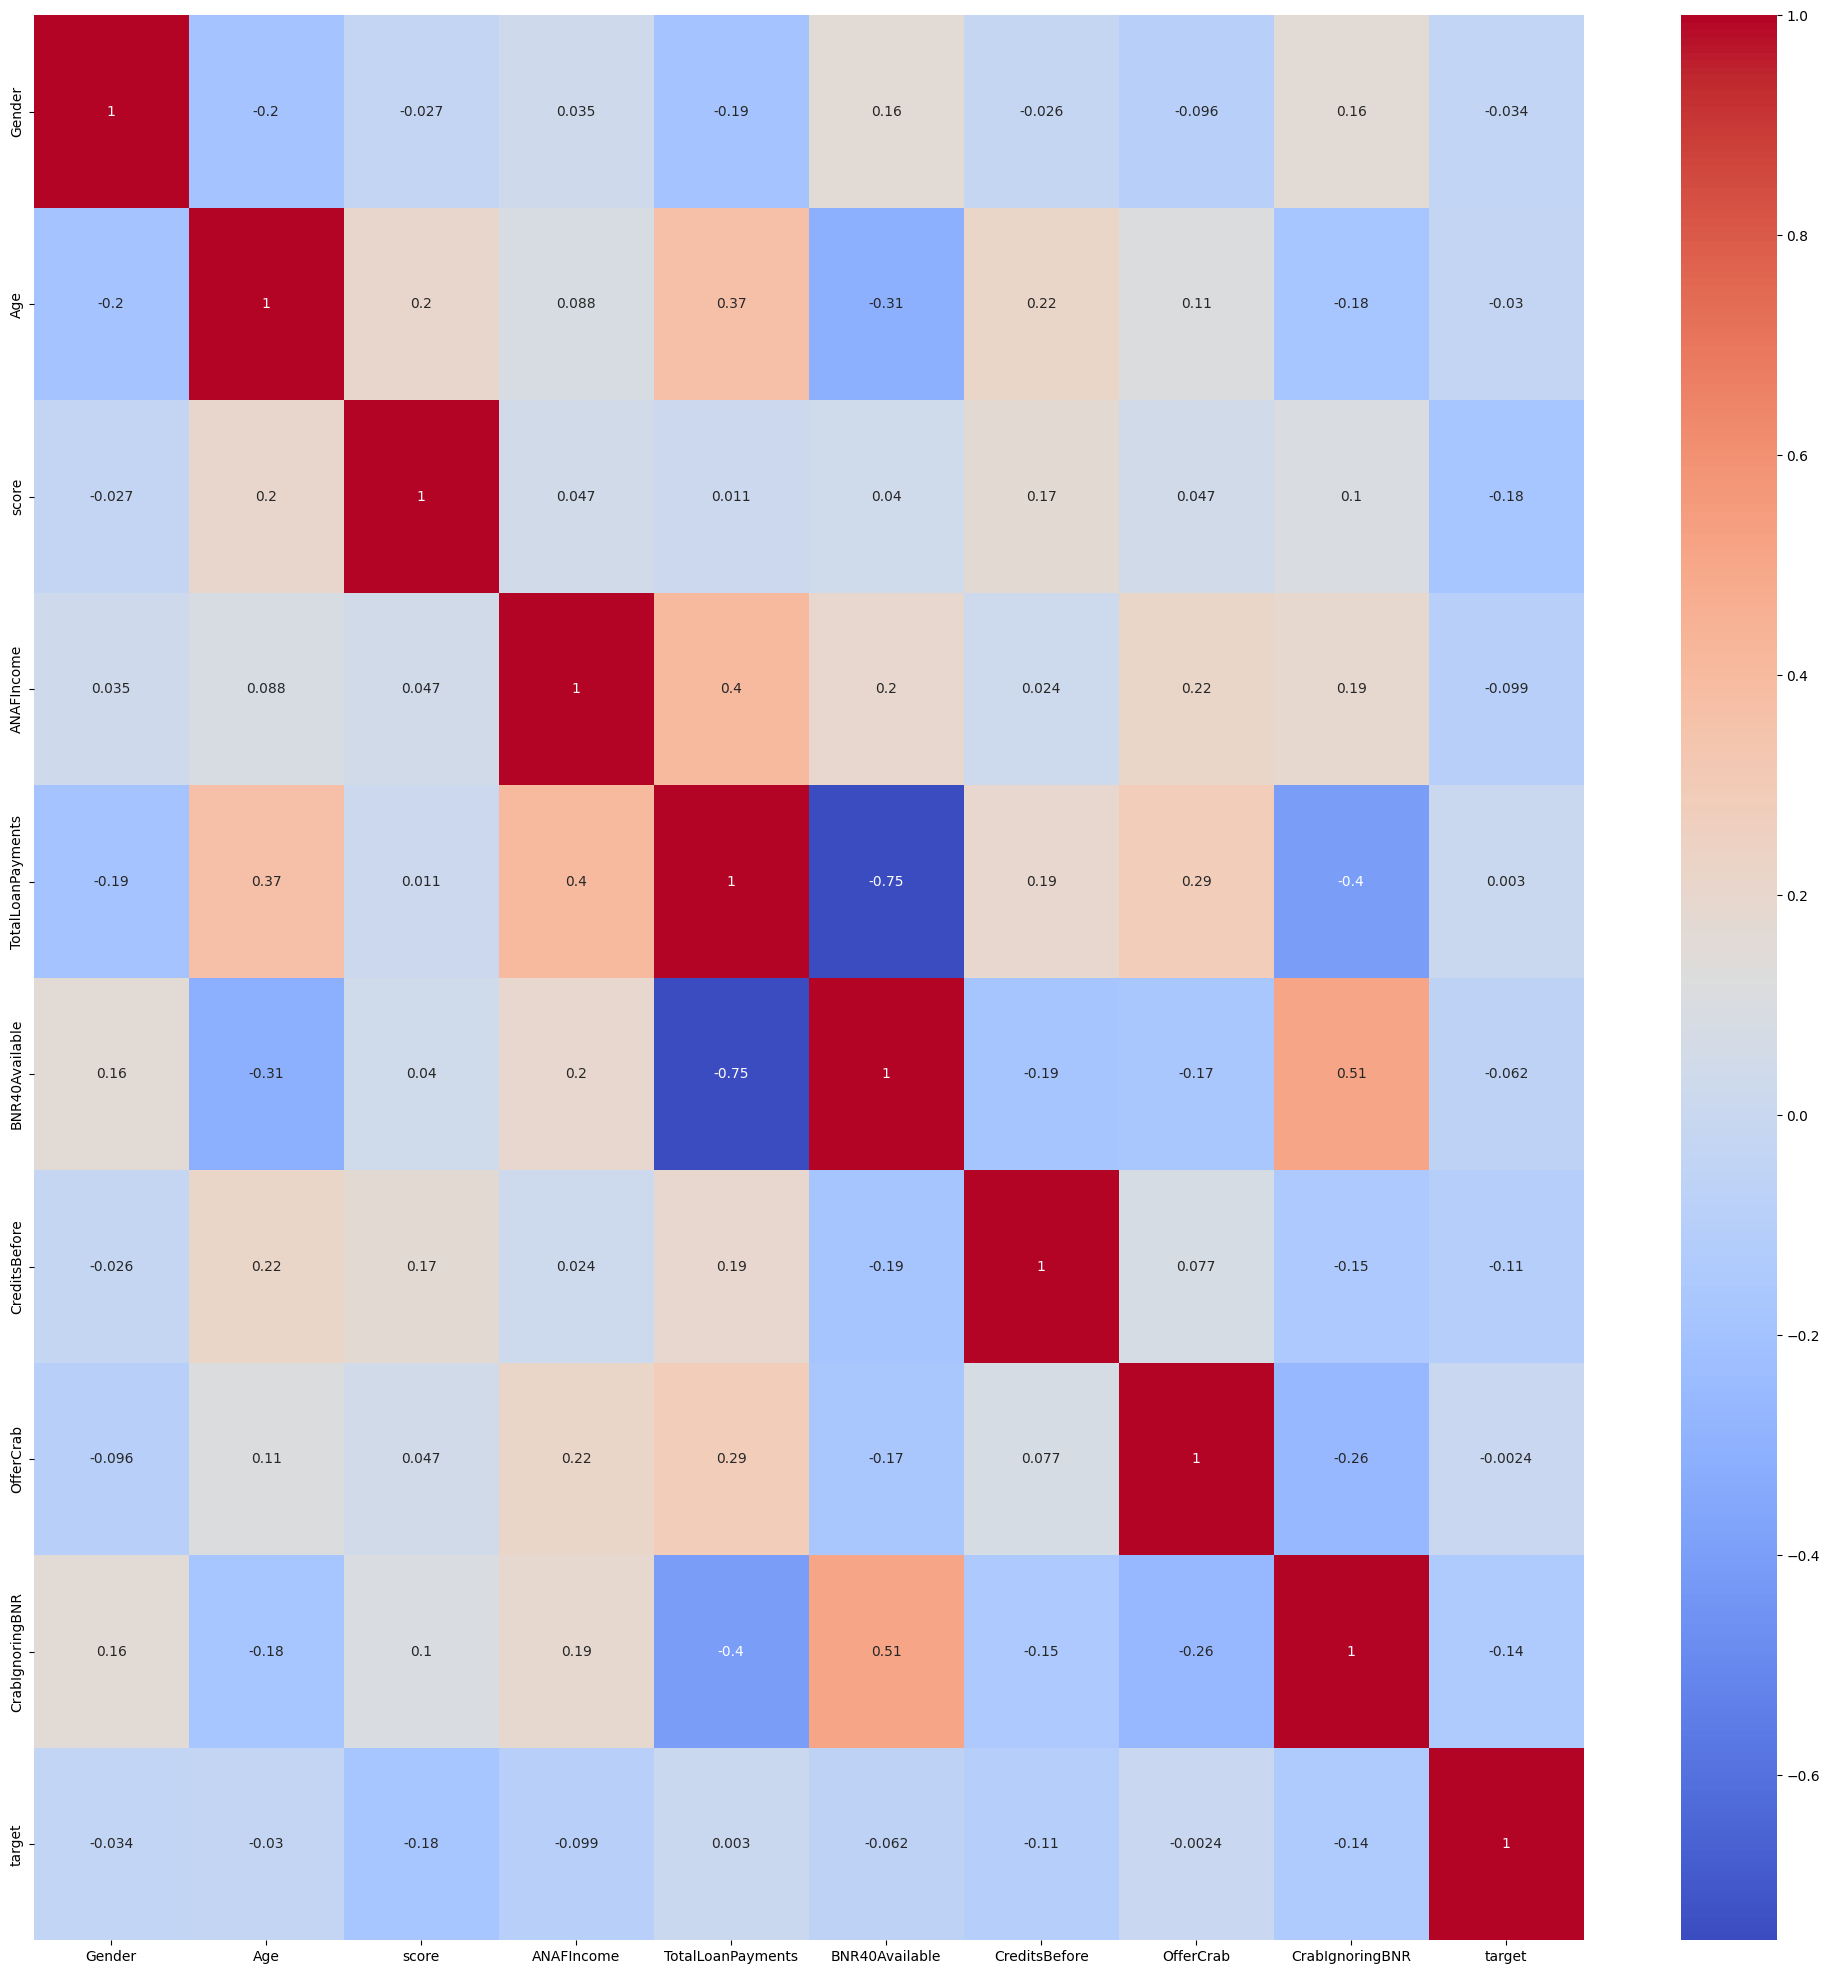

In [73]:
df_crab=pd.concat([X_crab,y_crab],axis=1)
plt.figure(figsize=(25,25))
sns.heatmap(df_crab.corr(),annot=True,cmap='coolwarm')

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

# Fit the PCA model to the data
pca.fit(X_crab)
# Transform the data to the lower-dimensional space
X_pca = pca.transform(X_crab)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.72577126 0.27381154]



              precision    recall  f1-score   support

         0.0       0.97      0.66      0.79       142
         1.0       0.14      0.73      0.24        11

    accuracy                           0.67       153
   macro avg       0.56      0.69      0.51       153
weighted avg       0.91      0.67      0.75       153



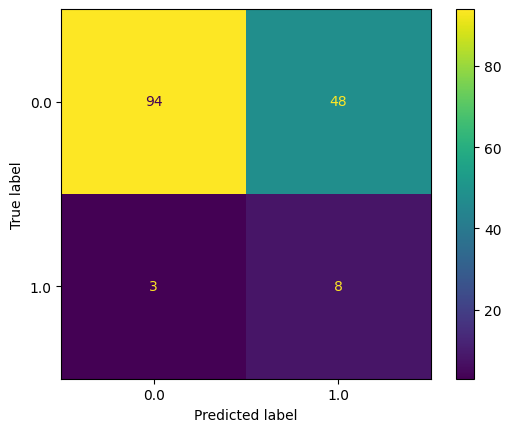

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X_crab,y_crab,test_size=0.2,random_state=42)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))

In [91]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_pca, y_crab)
# Check the class distribution after oversampling
print("Original Class Distribution:")
print(y_crab.value_counts())

print("Class Distribution after SMOTE:")
print(y_resampled.value_counts())

Original Class Distribution:
0.0    719
1.0     45
Name: target, dtype: int64
Class Distribution after SMOTE:
0.0    719
1.0    719
Name: target, dtype: int64



              precision    recall  f1-score   support

         0.0       0.76      0.53      0.62       140
         1.0       0.65      0.84      0.73       148

    accuracy                           0.69       288
   macro avg       0.70      0.68      0.68       288
weighted avg       0.70      0.69      0.68       288



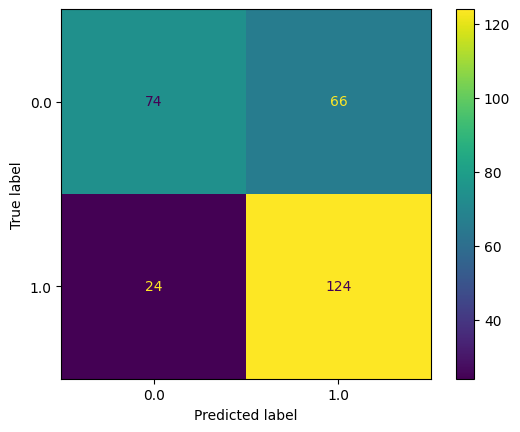

In [92]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.87      0.74      0.80       140
         1.0       0.78      0.89      0.83       148

    accuracy                           0.82       288
   macro avg       0.82      0.81      0.81       288
weighted avg       0.82      0.82      0.81       288



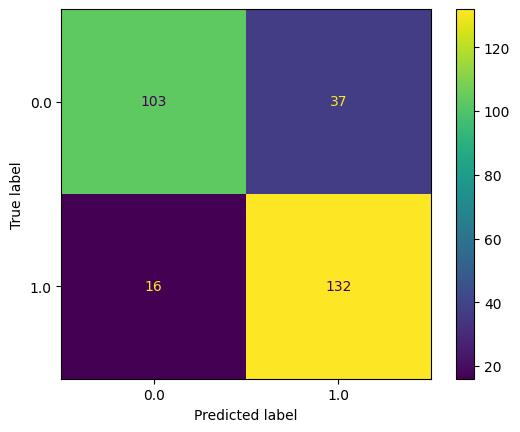

In [93]:
lgb_classifier.fit(X_train,y_train)
y_pred = lgb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print("\n"+ classification_report(y_test, y_pred))